## Imports
First of all I am going to import all relevant libraries that I'm foing to use while the assignment but, there may be more imports later.

In [ ]:
#imports
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# define plt & sns settings
sns.set_theme()
plt.rcParams["font.size"] = 20
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["xtick.labelsize"] = 20
plt.rcParams["ytick.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 20
plt.rcParams["legend.markerscale"] = 1.5
plt.rcParams["figure.figsize"] = (15, 15)
plt.rcParams["legend.title_fontsize"] = 20

### Reading data and dealing with missing values
reading the data using pandas data frames and take a look of which feature has missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


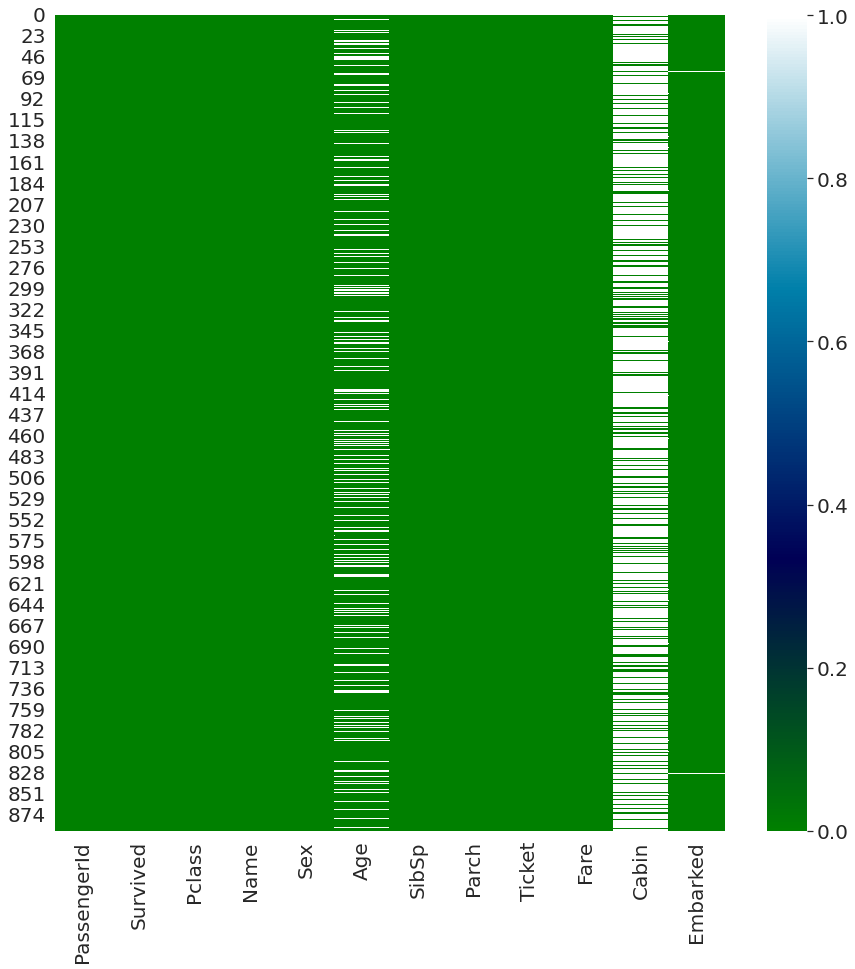

In [ ]:
titanic_train = pd.read_csv(r'./train.csv')
titanic_train.info()
sns.heatmap(data=titanic_train.isnull(), cmap='ocean')

I can see that only Age, Cabin and Embarked have missing values in the data.

1. Age: I choose to replace the missing ages with a mean.
1. Cabin: I'll need to research it further.
1. Embarked: because such a small precentage of data is missing for this parameter, I'll just assign it randomly.

First of all I changed all missing values into np.NaN

In [ ]:
titanic_train.replace('', np.NaN, inplace=True)
titanic_train.fillna(np.NaN, inplace=True)
titanic_train

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

### Age & Embarked 
filling the missing values as I mentioned above.

In [ ]:
mean_age = round(titanic_train['Age'].dropna().mean()) #mean age of existed ages in the data
titanic_train['Age'].fillna(mean_age, inplace=True)
df_not_null = titanic_train[~titanic_train['Embarked'].isnull()]
options = np.random.choice(df_not_null['Embarked']) #get random value of all possibles values in Embarked feature
titanic_train['Embarked'] = titanic_train['Embarked'].apply( \
lambda x: options if pd.isnull(x) else x)
titanic_train.isna().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked       False
dtype: bool

### Cabin
It looks that cabin feature is missing a lot of values so before removing that feature I will research it for being sure about removal.

In [ ]:
died_with_cabin_vals = sum(1 for x,y in zip(titanic_train['Survived'], titanic_train['Cabin']) \
if x == 0 and str(y) != 'nan') #all not survived passengers with cabin values in the data
survived_with_cabin_vals = sum(1 for x,y in zip(titanic_train['Survived'], titanic_train['Cabin']) \
if x == 1 and str(y) != 'nan') #all survived passengers with cabin values in the data
died_total = sum(1 for x in titanic_train['Survived'] if x == 0) 
survived_total = titanic_train.shape[0] - died_total 
survived_WCV_per = (survived_with_cabin_vals/survived_total) * 100 
#survived with cabin values out of total survivals percentage
died_WCV_per = (died_with_cabin_vals/died_total) * 100 
#not survived with cabin values out of total survivals percentage
survived_WCV_per_total = (survived_with_cabin_vals/titanic_train.shape[0]) * 100 
#survived with cabin values out of total passengers percentage 
died_WCV_per_total = (died_with_cabin_vals/titanic_train.shape[0]) * 100
#not survived with cabin values out of total passengers percentage 
print('Died with Cabin values from died total - {:.3f}%'.format(died_WCV_per))
print('Survived with Cabin values from survived total - {:.3f}%'.format(survived_WCV_per))
print('Died with Cabin values from total passengers - {:.3f}%'.format(died_WCV_per_total))
print('Survived with Cabin values from total passengers - {:.3f}%'.format(survived_WCV_per_total))
print('Died in total - {}'.format(died_total))
print('Survived in total - {}'.format(survived_total))

Died with Cabin values from died total - 12.386%
Survived with Cabin values from survived total - 39.766%
Died with Cabin values from total passengers - 7.632%
Survived with Cabin values from total passengers - 15.264%
Died in total - 549
Survived in total - 342


Something very interesting emerges! although overall there is an almost x2 chance to not-survive, if I look at the data that does contain Cabin information it is the complete opposite!

So it seems Cabin is relevant! I'll just have to tweak it to be binary to tell us if we do have info or not.

In [ ]:
binary_cabin = [1 if str(x) != 'nan' else 0 for x in titanic_train['Cabin'].tolist()]
titanic_train.replace(titanic_train['Cabin'].tolist(), binary_cabin, inplace=True)
display(titanic_train.isna().any(), titanic_train)

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female  30.0      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare  Cabin Embarked  
0        0         A/5 21171   7.2500      0        S  
1        0          PC 17599  71.2833      1        C  
2        0  STON/O2. 3101282   7.9250      0        S  
3        0            113803  53.1000      1        S  
4        0            373450   8.0500      0        S  
..     ...               ...      ...    ...      ...  
886      0            211536  13.0000      0        S  
887      0            112053  30.0000      1        S  
888      2        W./C. 6607  23.4500      0        S  
889      0            111369  30.0000      1        C  
890      0            370376   7.7500      0        Q  

[891 rows x 12 columns]

As we can see there is no missing values anymore and Cabin feature has been changed into binary data

## Researching the data
The next step is to research the data I gaved and try to understand the different features and how they may effect the output.

Our output for this model is didSurvive()? True/False - 1/0

Now lets draw some plots to see if I recognize any correlations between the features.

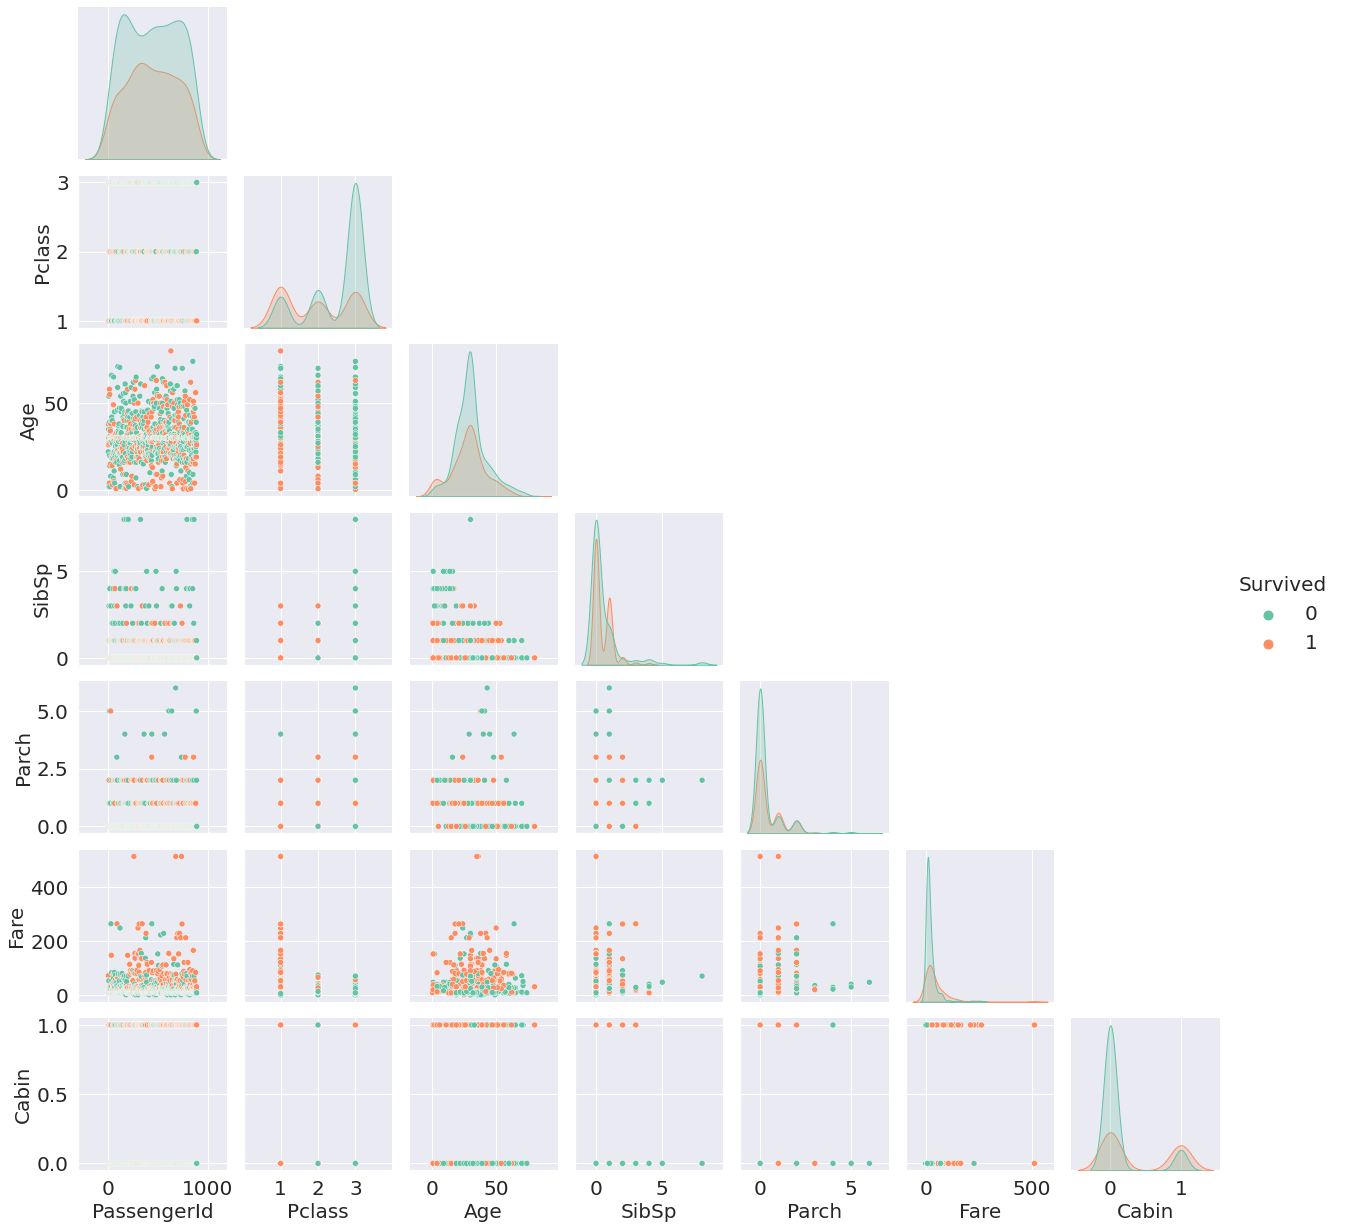

In [ ]:
sns.pairplot(titanic_train, hue='Survived', corner=True, palette='Set2')

**A very distinct features jump immediately**

1. You are distinctively more likely to die depending on your Pclass, especially if you are 3rd Pclass.
1. You are distinctively more likely to die depending on your Fare, the lower price you paid the lower chance to survive.
1. As we recognized before, having a cabin data increases yout survival chance.

Let's compute each feature I mentioned above and Embarked feature mean of values depending of survival chance

In [ ]:
pclass_chance = titanic_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()
fare_chance = titanic_train[['Fare', 'Survived']].groupby(['Fare'], as_index=False).mean()
cabin_chance = titanic_train[['Cabin', 'Survived']].groupby(['Cabin'], as_index=False).mean()
embarked_chance = titanic_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean()
display(pclass_chance, fare_chance, cabin_chance, embarked_chance)

Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363

Fare  Survived
0      0.0000  0.066667
1      4.0125  0.000000
2      5.0000  0.000000
3      6.2375  0.000000
4      6.4375  0.000000
..        ...       ...
243  227.5250  0.750000
244  247.5208  0.500000
245  262.3750  1.000000
246  263.0000  0.500000
247  512.3292  1.000000

[248 rows x 2 columns]

Cabin  Survived
0      0  0.299854
1      1  0.666667

Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009

It also kind of seems like the more relatives you have onboard the more likely you are to die but, I will also noticed that passengers with no relatives onboard at all are less likely to survive.
I decided to add a binary feature called 'Relatives' that represent if you have relatives onboard. 
Finally let's check the Sex feature following a suspicious hiding data about gender. 

Relatives  Survived
0          0  0.303538
1          1  0.552795
2          2  0.578431
3          3  0.724138
4          4  0.200000
5          5  0.136364
6          6  0.333333
7          7  0.000000
8         10  0.000000

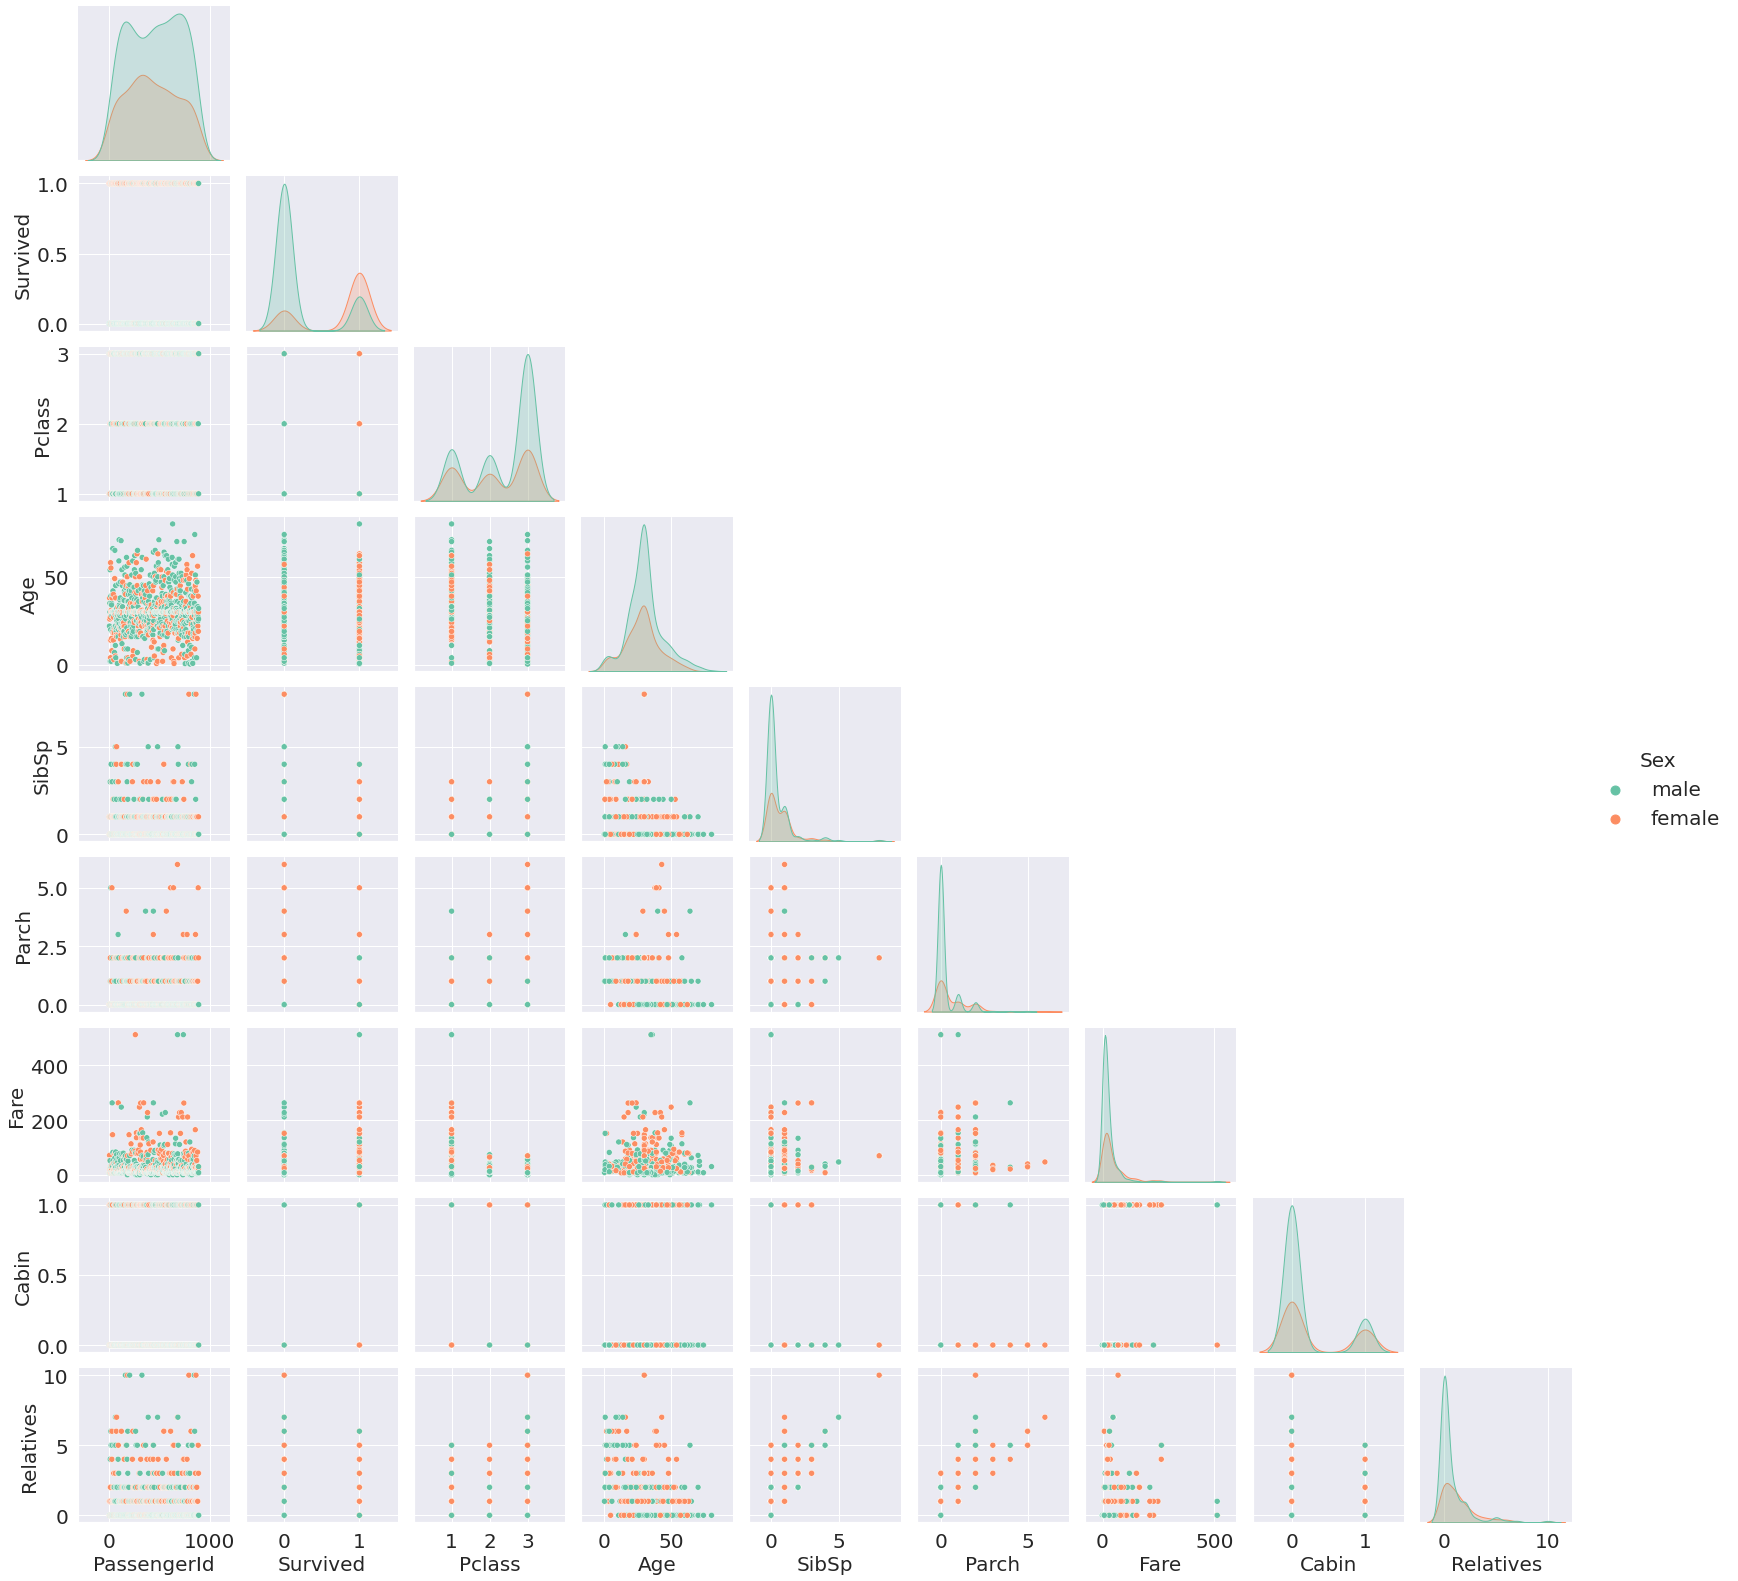

In [ ]:
relatives = [x+y for x,y in zip(titanic_train['SibSp'], titanic_train['Parch'])]
titanic_train['Relatives'] = relatives
relatives_chance = titanic_train[['Relatives', 'Survived']].groupby(['Relatives'], as_index=False).mean()
display(relatives_chance)
sns.pairplot(titanic_train, hue='Sex', corner=True, palette='Set2')

As suspected, mostly female survived.

Let's try and see what about correlations in the data.

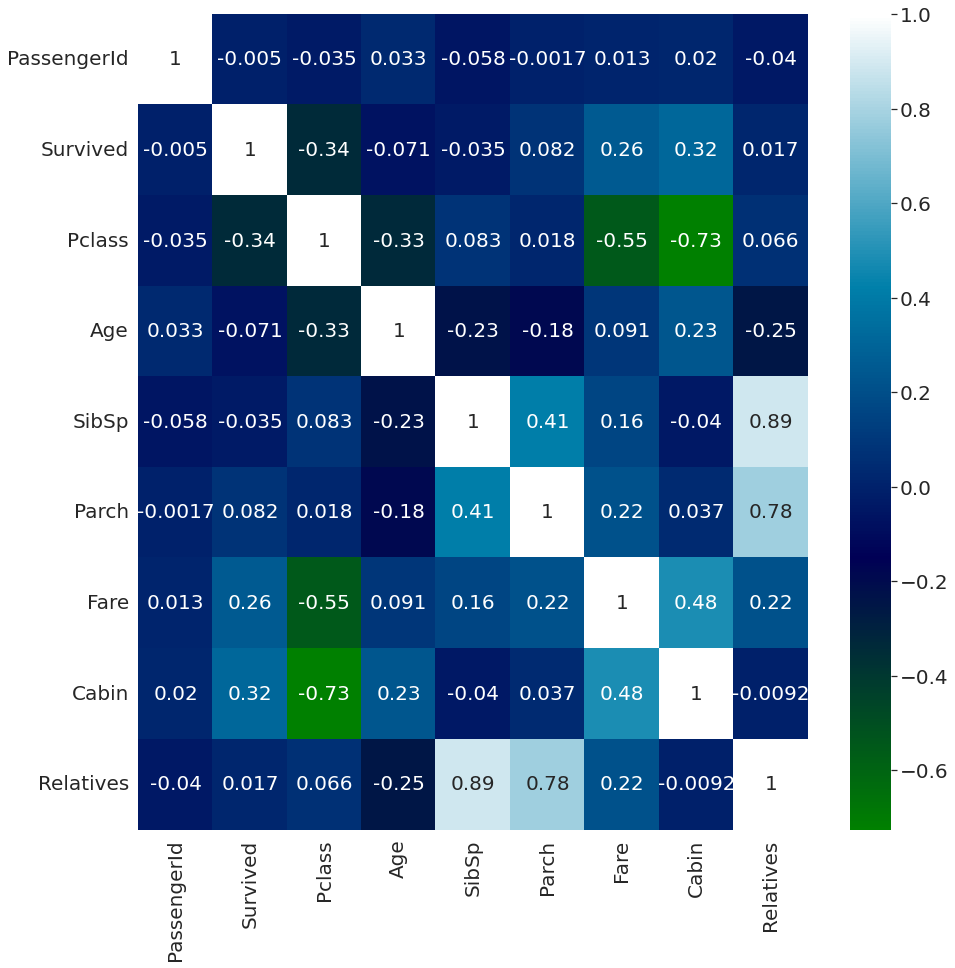

In [ ]:
corr = titanic_train.corr()
sns.heatmap(corr, annot=True, cmap=plt.cm.ocean)

The fact that there is a correlation of 0.41 between Parch and SibSb gives us more credit to merge them when data engineering.

Also we can see that there is a slight correlation between your Fare and Surviving chance.

Finally as I concluded from the 0.32 correlation that there is a slight correlation between cabin info existing and survival chance as well the fact that if you paid a large fare, you are likely to have a cabin info.

### Looking at names and finding titles

So I've noticed that the data contains titles such as Mrs. and Captain, I think that this data can further help us put an emphasis on the gender as well as status of a person so I want to add it to my features.

In [ ]:
# Extract the name titles
titles = titanic_train['Name'].str.extract(' ([a-zA-Z]+)\.')
titanic_train['Title'] = titles
# The following titles only appear a short amount so lets just merge them into one category
titanic_train['Title'] = titanic_train['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
titanic_train['Title'] = titanic_train['Title'].replace('Ms', 'Miss')
# 'Ms title only appears a few times and she always survives so i'm just gonna merge it with Miss - same meaning anyway
# Show a table of the mean of people who survived by title.
rate = titanic_train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()
titanic_train.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
# replace the titles with the acording survival mean from the table we got above!
display(rate)

Title  Survived
0  Master  0.575000
1    Miss  0.699454
2      Mr  0.156673
3     Mrs  0.792000
4   Other  0.423077

## Data research conclusion
lets conclude what we've learned. The following seem to have a higher chance of survival:

* Women (distinct title)
* 1st Class
* Large fare
* Cabin info exists
* Embarked from Chenbourg - 'C'

Therefore our feature engineering is going to focus mostly on 'Social-Economical' status, Sex, and title.

**EXTRA** Using sweetviz for a further looking at the data

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.1 MB 4.4 MB/s 


                                             |          | [  0%]   00:00 -> (? left)


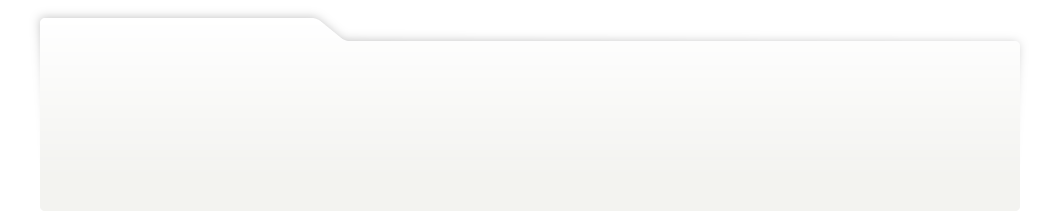
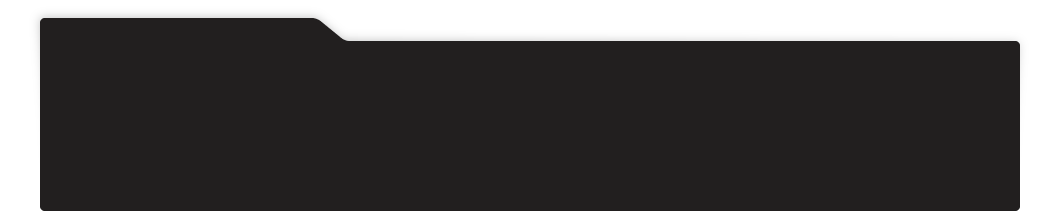
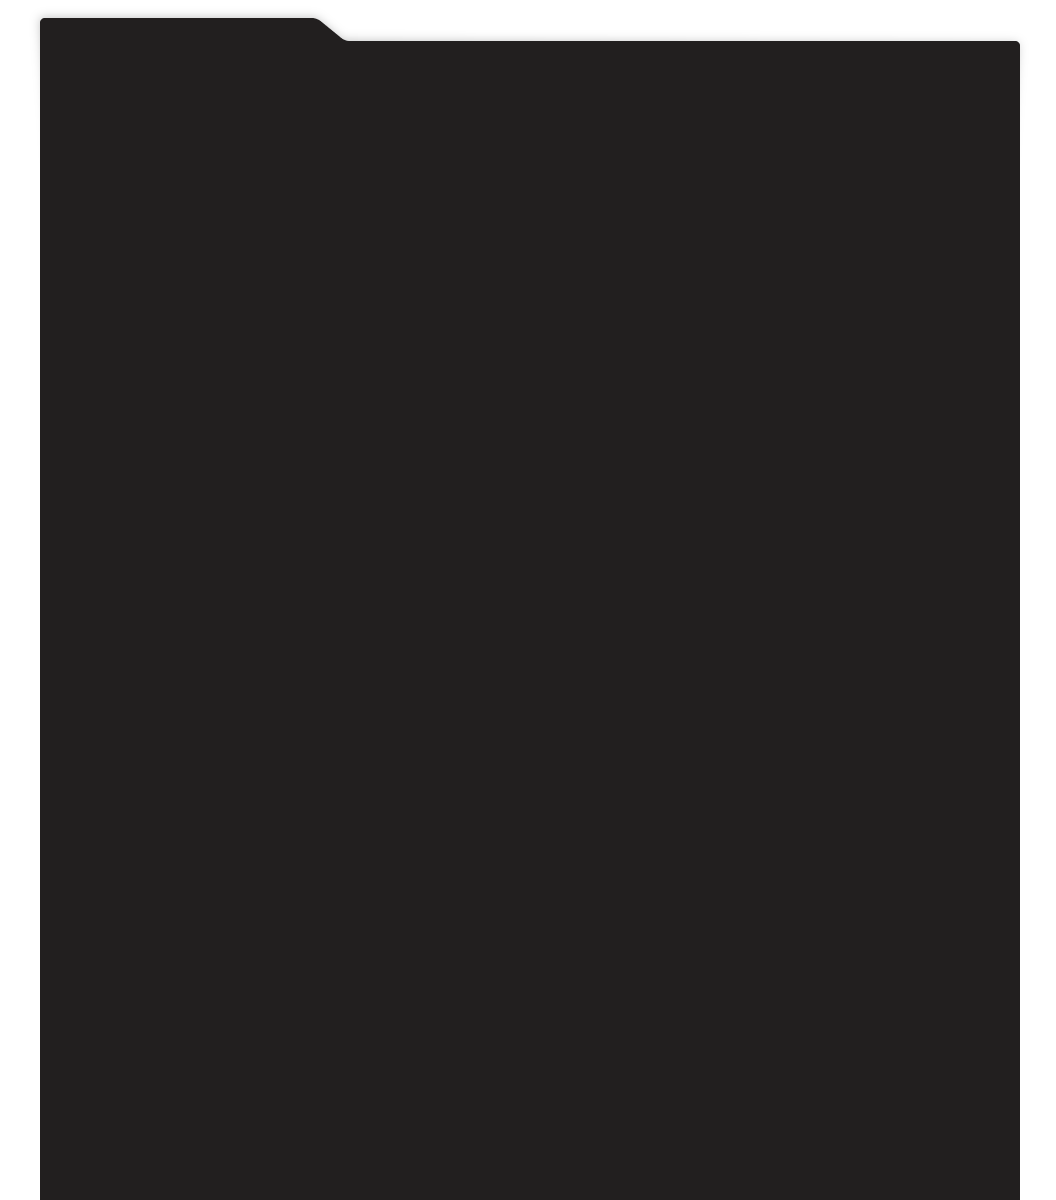
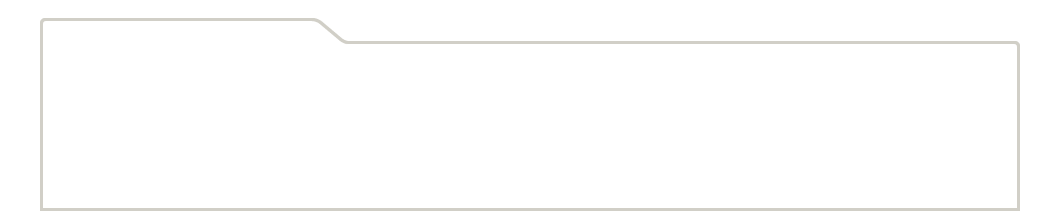
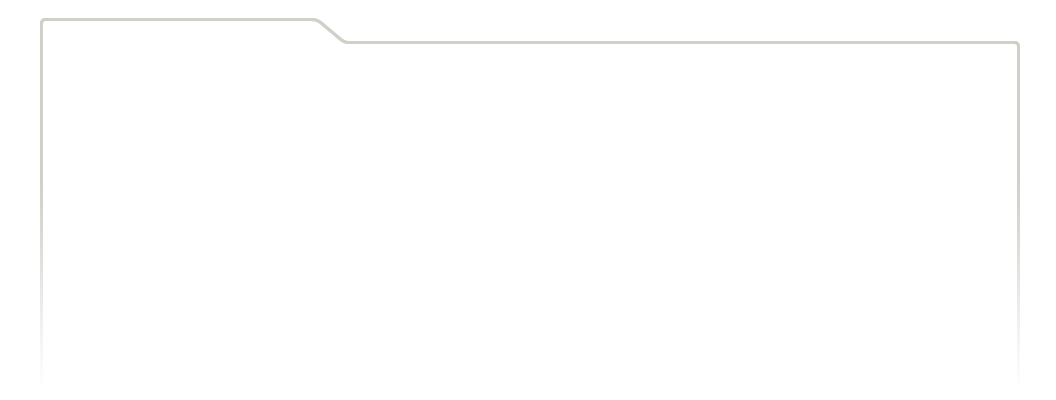
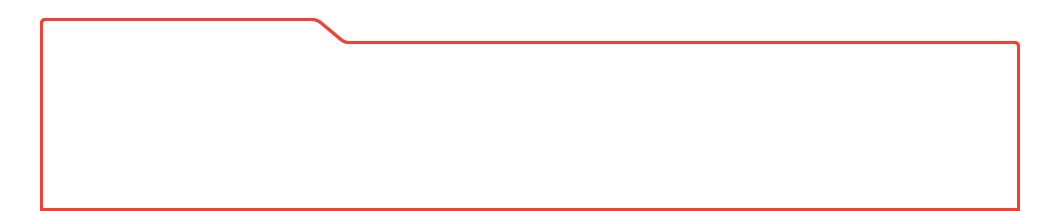
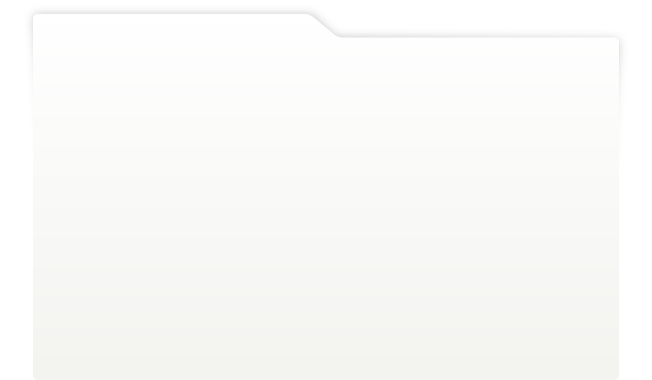
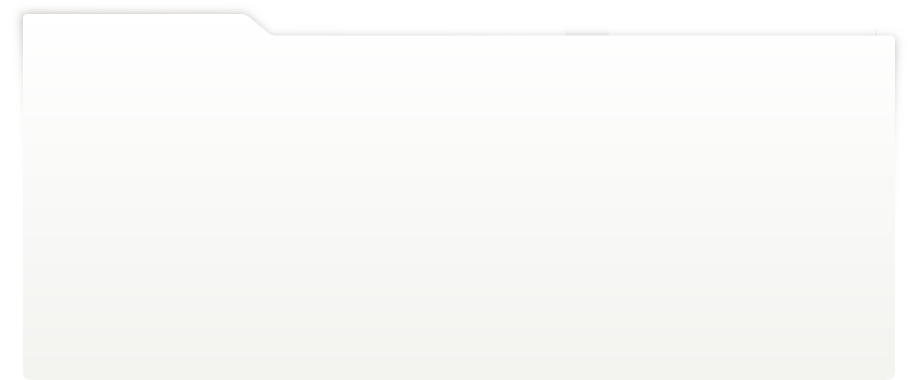
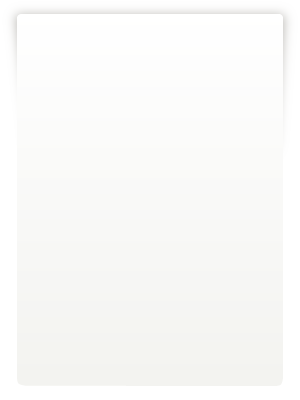
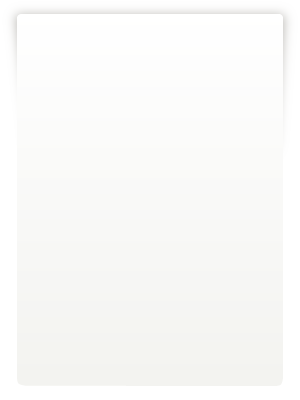
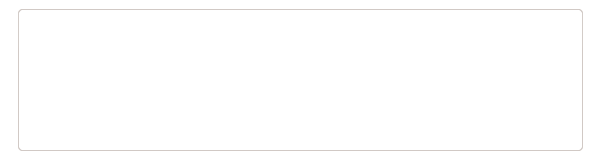
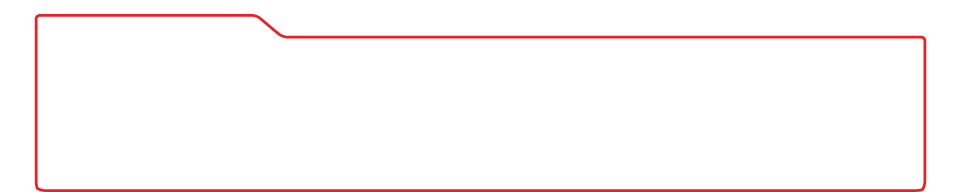
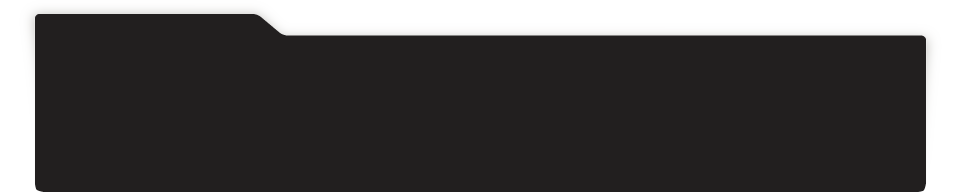
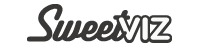
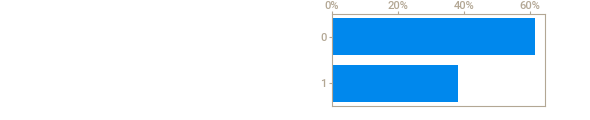
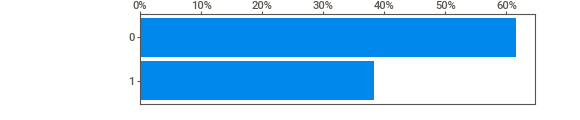
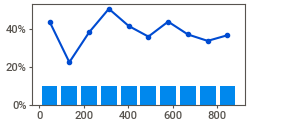
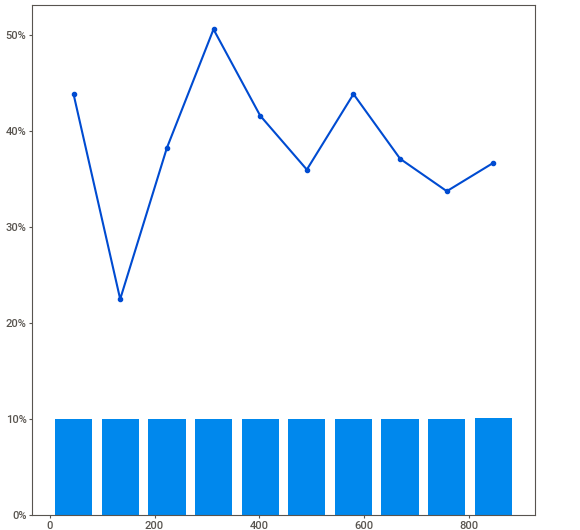
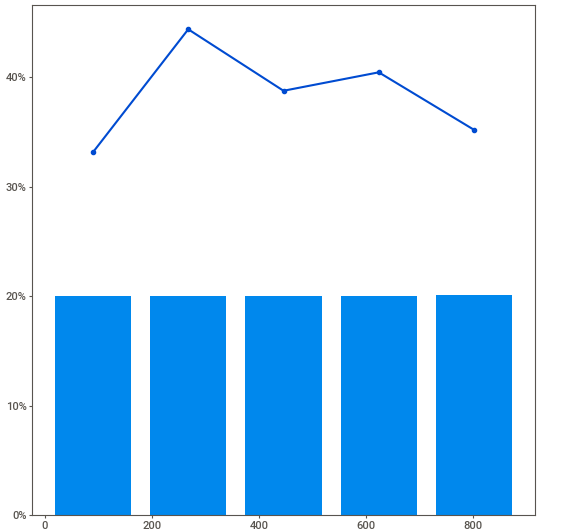
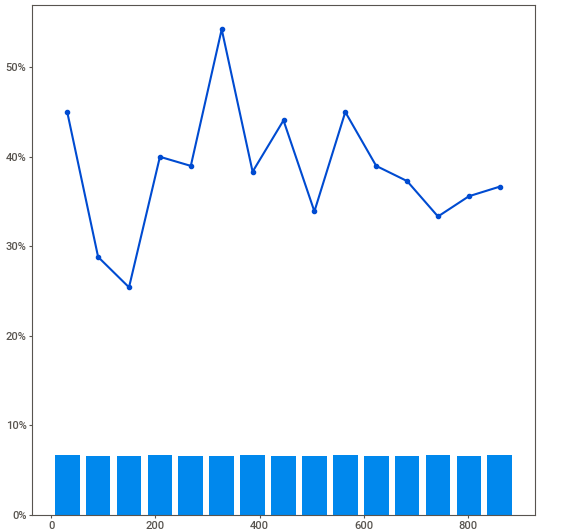
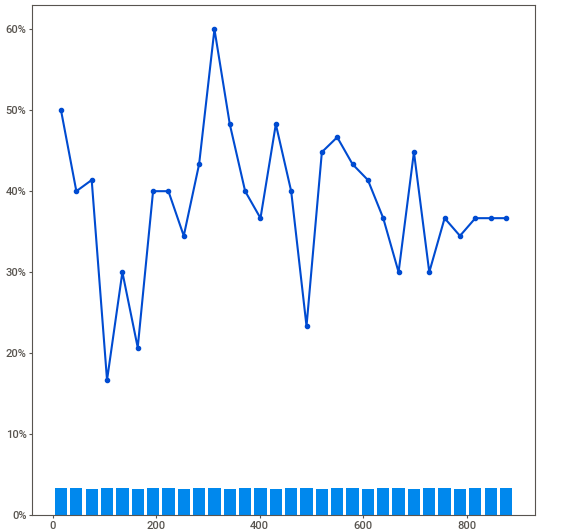
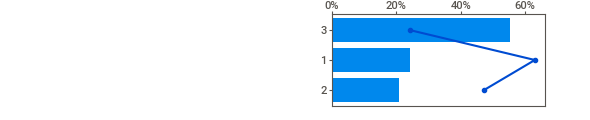
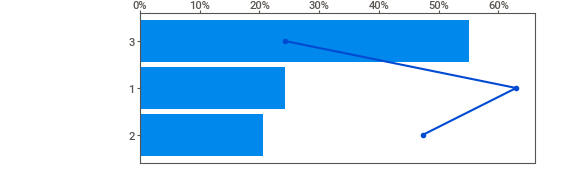
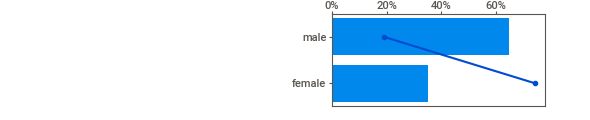
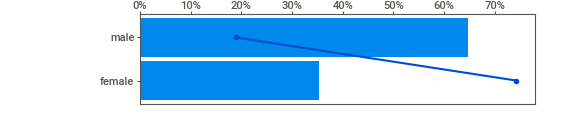
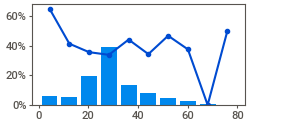
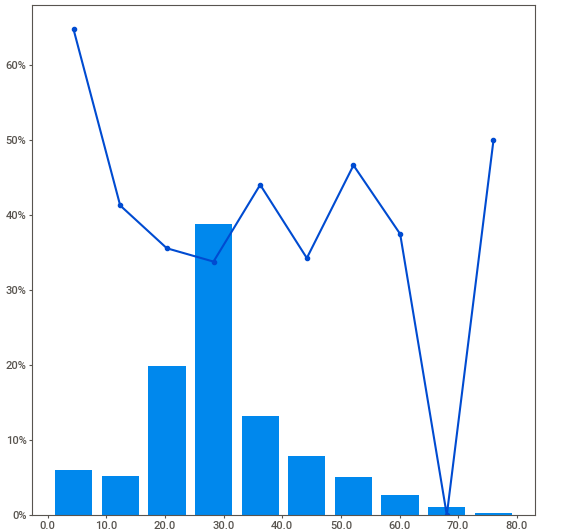
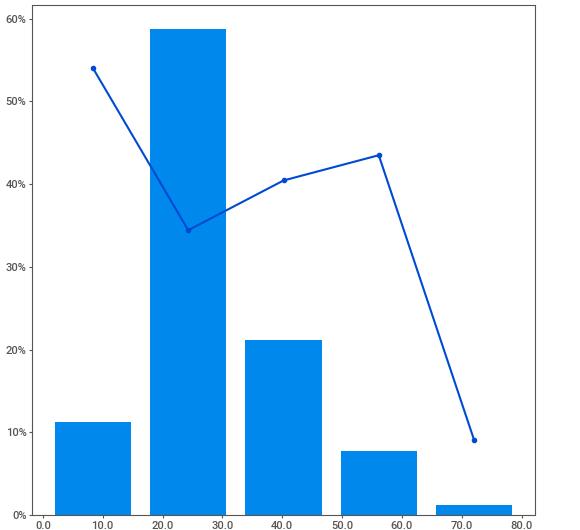
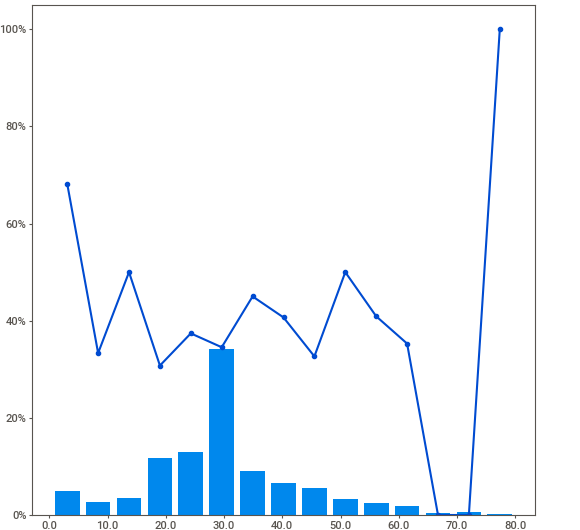
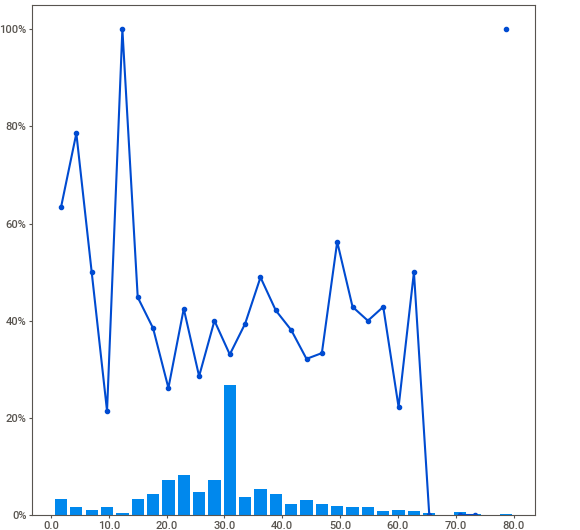
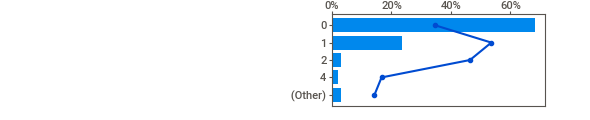
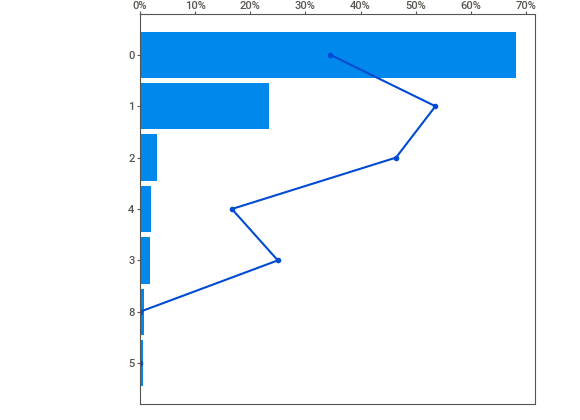
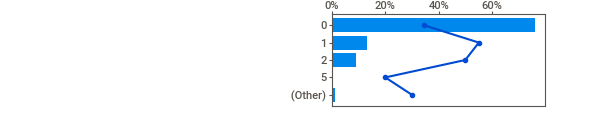
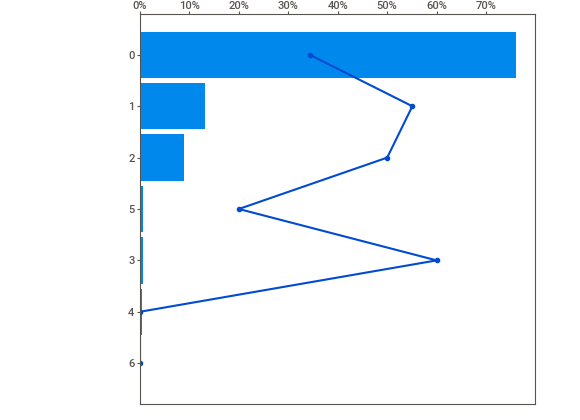
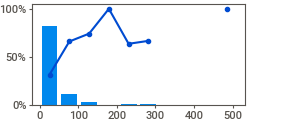
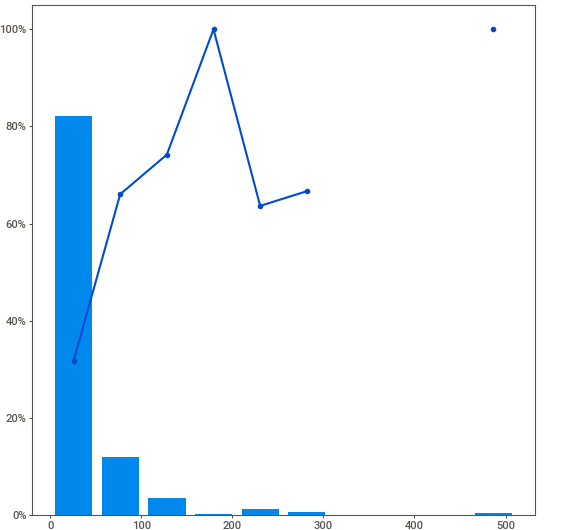
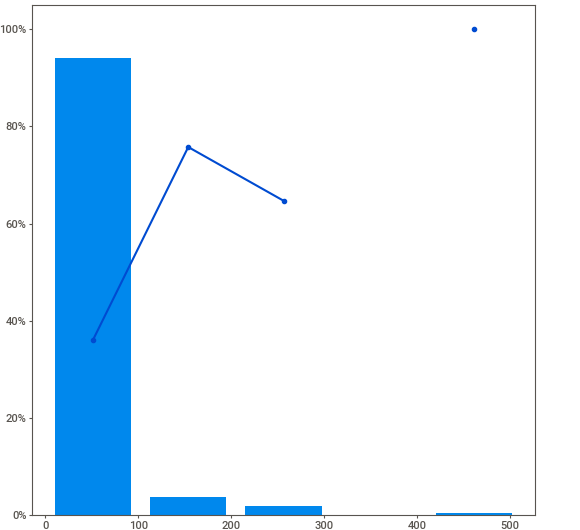
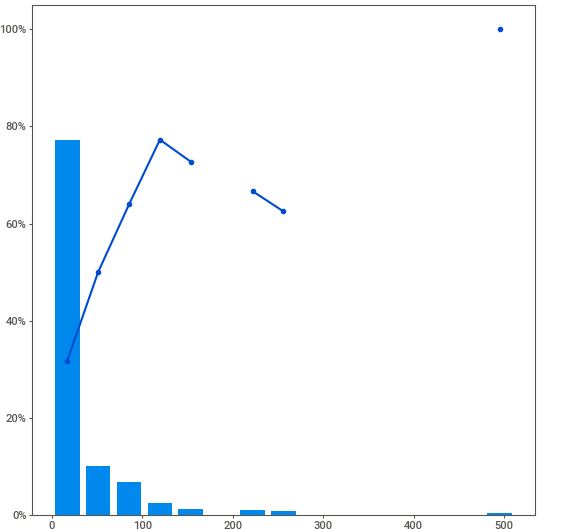
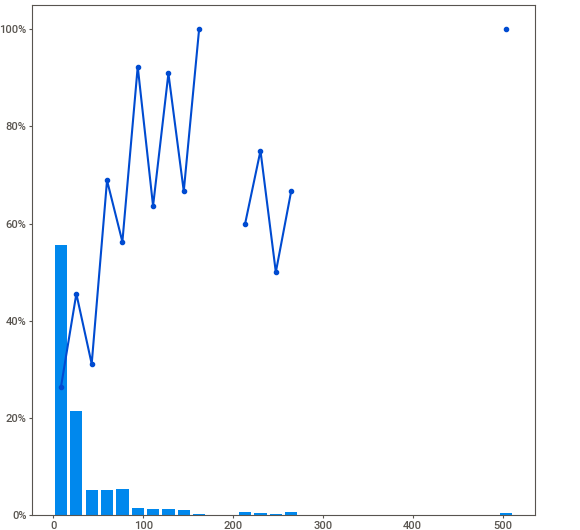
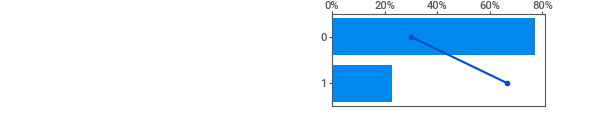
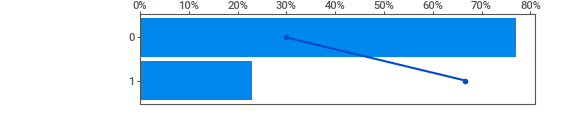
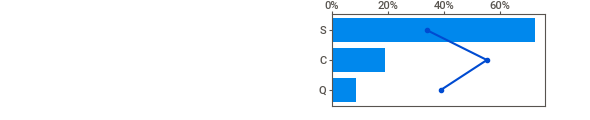
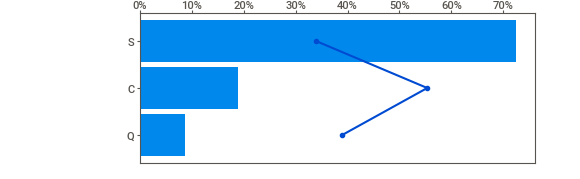
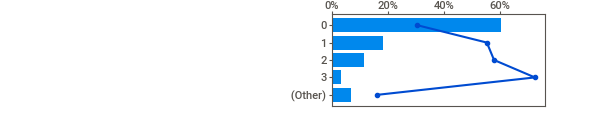
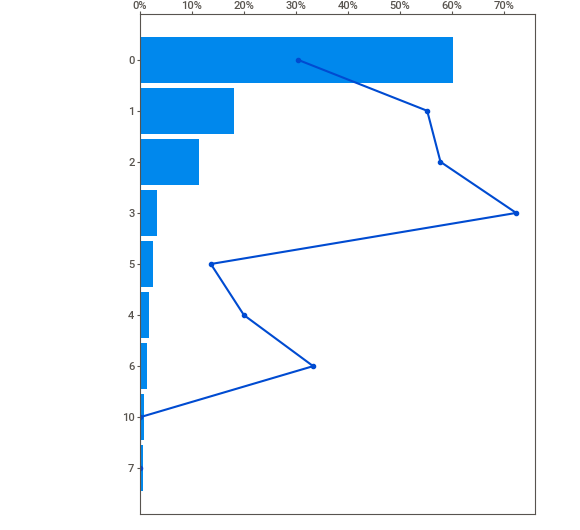
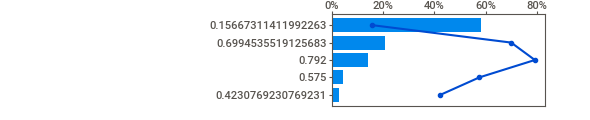
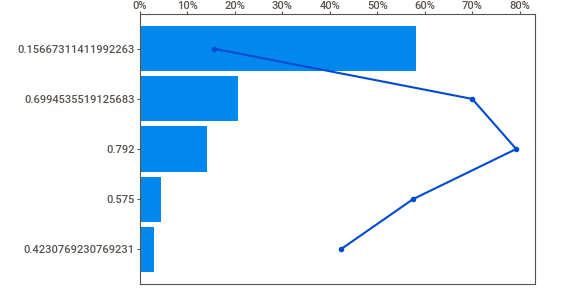
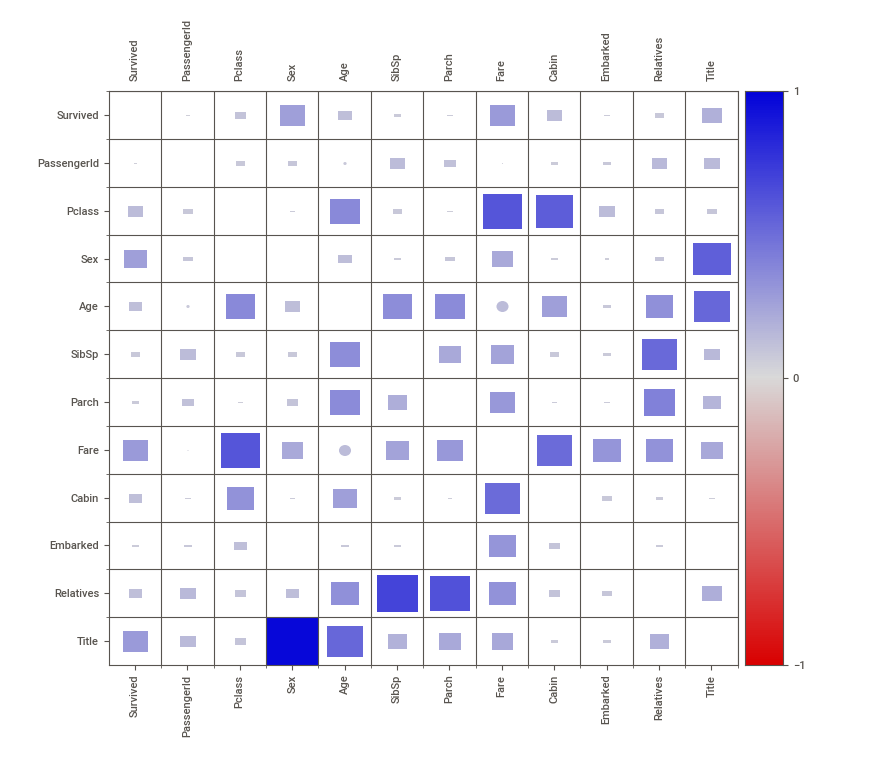
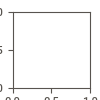

In [ ]:
!pip install sweetviz
import sweetviz as sw

titanic_report = sw.analyze(titanic_train, 'Survived')
titanic_report.show_notebook(layout='vertical')

## Data engineering
Lets add a few features to put extra 'weight' on certain parameters that we've seen that correlate with survival.

I'll start by giving a numerical definer to features like Sex and Embarked. For 'Embarked' I'm going to assign the number according to the survival mean we found.

Then I want to drop the names, ids and tickets because they probably don't have any significance to the survival chances or any that I can think of as useful in the features at least.

**[update]** After lots of testing I've found out that using a MinMaxScaler to Standerdize the data improves the score and model predictions on the test!

Also I've got a 1% improvement in the model by using the Feature-to-Survival Mean rate as a metric in the data instead of using a random categorial number.

In [ ]:
from sklearn.preprocessing import MinMaxScaler #for data standartization - for Age and Fare
from sklearn.preprocessing import OneHotEncoder

titanic_train.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

new_sex = [1 if x=='female' else 0 for x in titanic_train['Sex']] 
titanic_train.replace(titanic_train['Sex'].tolist(), new_sex, inplace=True)

transformed = titanic_train['Embarked'].to_numpy().reshape(-1, 1)
ohe = OneHotEncoder(sparse=False).fit(transformed)
embarked_encoded = pd.DataFrame(ohe.transform(transformed), columns=ohe.get_feature_names_out())
titanic_train = pd.concat([titanic_train, embarked_encoded], axis=1)
titanic_train.drop('Embarked', axis=1, inplace=True)

lonely = [1 if x==0 else 0 for x in titanic_train['Relatives']]
titanic_train['Lonely'] = lonely

mms = MinMaxScaler().fit(titanic_train)
norm_df = pd.DataFrame(mms.transform(titanic_train), columns=mms.get_feature_names_out())

display(norm_df)

Survived  Pclass  Sex       Age  SibSp     Parch      Fare  Cabin  \
0         0.0     1.0  0.0  0.271174  0.125  0.000000  0.014151    0.0   
1         1.0     0.0  1.0  0.472229  0.125  0.000000  0.139136    1.0   
2         1.0     1.0  1.0  0.321438  0.000  0.000000  0.015469    0.0   
3         1.0     0.0  1.0  0.434531  0.125  0.000000  0.103644    1.0   
4         0.0     1.0  0.0  0.434531  0.000  0.000000  0.015713    0.0   
..        ...     ...  ...       ...    ...       ...       ...    ...   
886       0.0     0.5  0.0  0.334004  0.000  0.000000  0.025374    0.0   
887       1.0     0.0  1.0  0.233476  0.000  0.000000  0.058556    1.0   
888       0.0     1.0  1.0  0.371701  0.125  0.333333  0.045771    0.0   
889       1.0     0.0  0.0  0.321438  0.000  0.000000  0.058556    1.0   
890       0.0     1.0  0.0  0.396833  0.000  0.000000  0.015127    0.0   

     Relatives     Title  x0_C  x0_Q  x0_S  Lonely  
0          0.1  0.000000   0.0   0.0   1.0     0.0  
1          0.1  1.000000   1.0   0.0   0.0     0.0  
2          0.0  0.854333   0.0   0.0   1.0     1.0  
3          0.1  1.000000   0.0   0.0   1.0     0.0  
4          0.0  0.000000   0.0   0.0   1.0     1.0  
..         ...       ...   ...   ...   ...     ...  
886        0.0  0.419318   0.0   0.0   1.0     1.0  
887        0.0  0.854333   0.0   0.0   1.0     1.0  
888        0.3  0.854333   0.0   0.0   1.0     0.0  
889        0.0  0.000000   1.0   0.0   0.0     1.0  
890        0.0  0.000000   0.0   1.0   0.0     1.0  

[891 rows x 14 columns]

You can notice that I've done some editing to the data such as derving it by certain features and scalars, this is because I want to normalize all the features to be in an approximate scale of 0-10.

**Preparing the data for training and validating**

Lets split the data to train and valid to test out how well we do. But before that we need to seperate the target from the features!

In [ ]:
t = titanic_train['Survived'].copy()
titanic_train.drop('Survived', axis=1, inplace=True)
norm_df.drop('Survived', axis=1, inplace=True)

Importing the 'tqdm' library and create a find_len function for later use.

In [ ]:
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
  i = 0
  if use_pbar:
    pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')
  
  for a in generator:
    i += 1
    if use_pbar:
      pbar.update()
    
  if use_pbar:
    pbar.close()

  return i

## Model Selection - Feature Selection, CV

For this assignment we have to choose between 3 models which are: KNN, NBC and LDA, or a combination of them in order to achieve the highest model score. So first we are going to import these models from the sklearn library.

Then I am going to test the 3 models using KFold, not before I test the KNN seperately using GridSearch in order to find the best n_neighbors param. We are not going to use the LPO method because it is very exausive - we have about 800 samples and so if we use the lowest LPO method of 2, for instance, we'll get 320k iterations.

In [ ]:
from sklearn.neighbors import KNeighborsRegressor #KNN
from sklearn.naive_bayes import GaussianNB #NBC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis #LDA

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
import plotly.express as px

def get_kfold_score(X, t, model, k, show_score_loss_graphs=False, use_pbar=True):
  scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])
  cv = KFold(n_splits=k, shuffle=True, random_state=42)

  if use_pbar:
    pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

  for i, (train_ids, val_ids) in enumerate(cv.split(X)):
    X_train = X.loc[train_ids]
    t_train = t.loc[train_ids]
    X_val = X.loc[val_ids]
    t_val = t.loc[val_ids]

    model.fit(X_train, t_train)

    y_train = model.predict(X_train)
    y_val = model.predict(X_val)
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mse(t_train, y_train)]
    scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mse(t_val, y_val)]

    if use_pbar:
      pbar.update()
    
  if use_pbar:
    pbar.close()
  
  train_scores_losses_df = scores_losses_df[scores_losses_df['split'] == 'train']
  val_scores_losses_df = scores_losses_df[scores_losses_df['split'] == 'val']

  mean_train_score = train_scores_losses_df['score'].mean()
  mean_val_score = val_scores_losses_df['score'].mean()

  if show_score_loss_graphs:
    print(f'Using model: {type(model).__name__}')
    fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', \
                  title=f'Mean Train Score: {mean_train_score:.2f}, Mean Val Score: {mean_val_score:.2f}')
    fig.show()
  
  return mean_train_score, mean_val_score

In [ ]:
from sklearn.model_selection import GridSearchCV

def gris_search(model, params, x=norm_df, t=t):
  gs_model = GridSearchCV(model, params).fit(x, t)
  print(f'Accuracy score for classification using {type(model).__name__}:')
  print('gs_model - ', gs_model.best_score_)
  print('best params - ', gs_model.best_params_)

gris_search(KNeighborsRegressor(), {'n_neighbors': [3, 5, 10, 15, 20, 30, 40, 50, 100]})

Accuracy score for classification using KNeighborsRegressor:
gs_model -  0.41324041458053484
best params -  {'n_neighbors': 20}


The best n seems to be 20, now we can test the other models.

In [ ]:
get_kfold_score(norm_df, t, KNeighborsRegressor(n_neighbors=20), 50, show_score_loss_graphs=True)
get_kfold_score(norm_df, t, GaussianNB(), 50, show_score_loss_graphs=True)
get_kfold_score(norm_df, t, LinearDiscriminantAnalysis(), 50, show_score_loss_graphs=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: KNeighborsRegressor


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: GaussianNB


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: LinearDiscriminantAnalysis


(0.8306421215147537, 0.8231372549019604)

Now lets find the best Train-Valid ratio for the datasplit. We'll note that it is very dependant on the random_state because it decides what specific features are selected for training and in what order, and so we are also going to include GridSearch to find the optimal one between a few values first.

In [ ]:
from sklearn import model_selection

def plot_score_graph(graph_points):
    for k, v in graph_points.items():
        best_value = max(v.values())
        best_index = np.argmax(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=list(v.keys()), y=list(v.values()), \
                         title=f'{k}, best value: x={best_index+1}, y={best_value}', color_discrete_sequence=[color])
        fig.data[0].update(mode='markers+lines')
        fig.show()

def plot_score_by_split(model, X, t):
    graph_points = { 'train_score' : {}, 'val_score' : {} }
    scores = []
    for size in range(10, 100, 10):
        X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42)
        Model = model.fit(X_train, t_train)
        graph_points['train_score'][size/100] = Model.score(X_train, t_train)
        graph_points['val_score'][size/100] = Model.score(X_val, t_val)

    plot_score_graph(graph_points)

plot_score_by_split(LinearDiscriminantAnalysis(), norm_df, t)

Now that we have found that the best split is 0.25 valid size, we can go further and explore how a **Polynomeal Increase** the features affects our score - using this method we are going to create custom features.

Important Note - We need to increase the **non-normalized** data in order to not lose any crucial information while merging features!

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

X_train, X_val, t_train, t_val = model_selection.train_test_split(titanic_train, t, test_size=0.25, random_state=42)

def plot_score_and_loss_by_degree(X_train, t_train, X_val, t_val):
    graph_points = { 'KNN_train_score' : {}, 'KNN_val_score' : {}, 'NBC_train_score' : {}, 'NBC_val_score' : {},\
                    'LDA_train_score' : {}, 'LDA_val_score' : {} }
    
    max_deg_of_features = 4
    for deg in range(1, max_deg_of_features+1):
        pipe1 = make_pipeline(PolynomialFeatures(deg, include_bias=False), MinMaxScaler(), KNeighborsRegressor(n_neighbors=5))
        pipe2 = make_pipeline(PolynomialFeatures(deg, include_bias=False), MinMaxScaler(), GaussianNB())
        pipe3 = make_pipeline(PolynomialFeatures(deg, include_bias=False), MinMaxScaler(), LinearDiscriminantAnalysis())
        
        model1 = pipe1.fit(X_train, t_train)
        model2 = pipe2.fit(X_train, t_train)
        model3 = pipe3.fit(X_train, t_train)

        graph_points['KNN_train_score'][deg] = pipe1.score(X_train, t_train)
        graph_points['KNN_val_score'][deg] = pipe1.score(X_val, t_val)
        graph_points['NBC_train_score'][deg] = pipe2.score(X_train, t_train)
        graph_points['NBC_val_score'][deg] = pipe2.score(X_val, t_val)
        graph_points['LDA_train_score'][deg] = pipe3.score(X_train, t_train)
        graph_points['LDA_val_score'][deg] = pipe3.score(X_val, t_val)

    plot_score_graph(graph_points)

plot_score_and_loss_by_degree(X_train, t_train, X_val, t_val)

It seems that a degree of 2 is the sweetspot. Now we are going to use the RFECV feature selection and cross validation library in order to pick the best features out of these new features to see if we can imporve the score even further and leave only the best ones.

First we need to prepare the new features.

In [ ]:
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import SGDRegressor
import plotly.graph_objects as go

pol = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), MinMaxScaler())
pol_df = pd.DataFrame(pol.fit_transform(titanic_train), columns=pol.get_feature_names_out())

lda = LinearDiscriminantAnalysis()
rkf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=42)
selector = RFECV(lda, cv=rkf).fit(pol_df, t)
display(pol_df.loc[:, selector.support_])

fig = go.Figure()
results = selector.cv_results_['mean_test_score']
fig.add_trace(go.Scatter(x=[i for i in range(1, len(results)+1)], y=results))
fig.update_xaxes(title_text='Number of features selected')
fig.update_yaxes(title_text='Cross Validation score')
fig.show()

Pclass  Sex  SibSp     Parch      Fare  Relatives     Title  Pclass^2  \
0       1.0  0.0  0.125  0.000000  0.014151        0.1  0.000000     1.000   
1       0.0  1.0  0.125  0.000000  0.139136        0.1  1.000000     0.000   
2       1.0  1.0  0.000  0.000000  0.015469        0.0  0.854333     1.000   
3       0.0  1.0  0.125  0.000000  0.103644        0.1  1.000000     0.000   
4       1.0  0.0  0.000  0.000000  0.015713        0.0  0.000000     1.000   
..      ...  ...    ...       ...       ...        ...       ...       ...   
886     0.5  0.0  0.000  0.000000  0.025374        0.0  0.419318     0.375   
887     0.0  1.0  0.000  0.000000  0.058556        0.0  0.854333     0.000   
888     1.0  1.0  0.125  0.333333  0.045771        0.3  0.854333     1.000   
889     0.0  0.0  0.000  0.000000  0.058556        0.0  0.000000     0.000   
890     1.0  0.0  0.000  0.000000  0.015127        0.0  0.000000     1.000   

     Pclass Sex  Pclass SibSp  ...  SibSp x0_Q  Parch Fare  Parch x0_Q  \
0      0.000000      0.125000  ...         0.0    0.000000         0.0   
1      0.333333      0.041667  ...         0.0    0.000000         0.0   
2      1.000000      0.000000  ...         0.0    0.000000         0.0   
3      0.333333      0.041667  ...         0.0    0.000000         0.0   
4      0.000000      0.000000  ...         0.0    0.000000         0.0   
..          ...           ...  ...         ...         ...         ...   
886    0.000000      0.000000  ...         0.0    0.000000         0.0   
887    0.333333      0.000000  ...         0.0    0.000000         0.0   
888    1.000000      0.125000  ...         0.0    0.044582         0.0   
889    0.000000      0.000000  ...         0.0    0.000000         0.0   
890    0.000000      0.000000  ...         0.0    0.000000         0.0   

       Fare^2  Fare Cabin  Fare Title  Fare x0_C  Fare x0_Q  Fare x0_S  \
0    0.000200    0.000000    0.003170   0.000000   0.000000   0.027567   
1    0.019359    0.139136    0.157545   0.139136   0.000000   0.000000   
2    0.000239    0.000000    0.015469   0.000000   0.000000   0.030133   
3    0.010742    0.103644    0.117358   0.000000   0.000000   0.201901   
4    0.000247    0.000000    0.003520   0.000000   0.000000   0.030608   
..        ...         ...         ...        ...        ...        ...   
886  0.000644    0.000000    0.015348   0.000000   0.000000   0.049430   
887  0.003429    0.058556    0.058556   0.000000   0.000000   0.114068   
888  0.002095    0.000000    0.045771   0.000000   0.000000   0.089163   
889  0.003429    0.058556    0.013116   0.058556   0.000000   0.000000   
890  0.000229    0.000000    0.003388   0.000000   0.086111   0.000000   

      Title^2  
0    0.000000  
1    1.000000  
2    0.770989  
3    1.000000  
4    0.000000  
..        ...  
886  0.256252  
887  0.770989  
888  0.770989  
889  0.000000  
890  0.000000  

[891 rows x 34 columns]

So now we have 34 optimal features for the best greedy score that RFECV finds us.

---

## Ensembles

Now we are ready to try another optimization method which is ensambles, we have a few of them for this assignment that we can try:

Bagging:
  * NFold Bagging
  * Bootstrap Bagging

Boosting:
  * Gradient Boosting
  * AdaBoost

In [ ]:
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier

optim_df = pol_df.loc[:, selector.support_]

bc_model = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis()).fit(optim_df, t)
ac_model = AdaBoostClassifier()
gc_model = GradientBoostingClassifier()

gris_search(bc_model, {'n_estimators' : range(5, 31, 5), 'bootstrap' : [True, False]}, x=optim_df)
gris_search(ac_model, {'n_estimators' : range(5, 51, 5)}, x=optim_df)
gris_search(gc_model, {'n_estimators' : range(5, 51, 5)}, x=optim_df)

Accuracy score for classification using BaggingClassifier:
gs_model -  0.8338899001945892
best params -  {'bootstrap': True, 'n_estimators': 10}
Accuracy score for classification using AdaBoostClassifier:
gs_model -  0.8282844768062269
best params -  {'n_estimators': 35}
Accuracy score for classification using GradientBoostingClassifier:
gs_model -  0.838359173937606
best params -  {'n_estimators': 50}


the same score exactly, we'll use the optimal one.

Now let's check how the Ensambles themselves behave on the full dataset without CV, we are going to use the optimal parameters that GridSearch retuned in the last section of code ofcourse.

In [ ]:
print('Accuracy score for classification on optim_df:')
bag_fold_model = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),\
                                   n_estimators=10, random_state=42, bootstrap=False).fit(optim_df, t)
print('bag_fold_model', bag_fold_model.score(optim_df, t).mean())

bag_boost_model = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),\
                                   n_estimators=10, random_state=42, bootstrap=False).fit(optim_df, t)
print('bag_boot_score', bag_boost_model.score(optim_df,t).mean())

ada_boost_model = AdaBoostClassifier(n_estimators=35, random_state=42).fit(optim_df, t)
print('ada_boost_score', ada_boost_model.score(optim_df, t).mean())

grad_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42).fit(optim_df, t)
print('grad_boost_score', grad_boost_model.score(optim_df, t).mean())    

print('\nAccuracy score for classification on pol_df:')
bag_fold_model =  BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),\
                                   n_estimators=10, random_state=42, bootstrap=False).fit(pol_df, t)  
print('bag_fold_model', bag_fold_model.score(pol_df, t).mean())   

bag_boost_model = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(),\
                                   n_estimators=10, random_state=42, bootstrap=False).fit(pol_df, t)
print('bag_boot_score', bag_boost_model.score(pol_df,t).mean())

ada_boost_model = AdaBoostClassifier(n_estimators=35, random_state=42).fit(pol_df, t)
print('ada_boost_score', ada_boost_model.score(pol_df, t).mean())

grad_boost_model = GradientBoostingClassifier(n_estimators=50, random_state=42).fit(pol_df, t)
print('grad_boost_score', grad_boost_model.score(pol_df, t).mean())

Accuracy score for classification on optim_df:
bag_fold_model 0.8372615039281706
bag_boot_score 0.8372615039281706
ada_boost_score 0.8597081930415263
grad_boost_score 0.8888888888888888

Accuracy score for classification on pol_df:
bag_fold_model 0.8574635241301908
bag_boot_score 0.8574635241301908
ada_boost_score 0.8698092031425365
grad_boost_score 0.8967452300785634


Interesting... when training on the full dataset without CV we generate much higher scores and the best model is GradientBoosting.

### Creating the Final Model

So after I'm satisfied with the results of the various model testings, I'm going to create a model that has been trained on the whole set after the following tweaks:

* Polynomeal increase of the features to the degree of 2
* Feature Selection out of the above using the features we recieved from RFECV on the training set (34 features in total).

Our best model stays the LinearDiscriminantAnalysis.

Let's test our assumption to see which one generates the best score; GradientBoosting which had the highest score when training on the full dataset, or the winner of GridSearchCV; Bagging Bootstrap.

Lets also test another GS with the polynomial features just in case the RFECV did not yield the real optimal ones and we are missing data.

In [ ]:
model1 = BaggingClassifier(base_estimator=LinearDiscriminantAnalysis(), n_estimators=15, random_state=42, bootstrap=False).fit(optim_df, t)
model2 = GradientBoostingClassifier(n_estimators=50, random_state=42).fit(optim_df, t)
model3 = AdaBoostClassifier(n_estimators=45, random_state=42).fit(optim_df, t)

Testing the three models using CV:

In [ ]:
get_kfold_score(optim_df, t, model1, 50, show_score_loss_graphs=True)
get_kfold_score(optim_df, t, model2, 50, show_score_loss_graphs=True)
get_kfold_score(optim_df, t, model3, 50, show_score_loss_graphs=True)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: BaggingClassifier


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: GradientBoostingClassifier


Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/50 [00:00<?, ?it/s]

Using model: AdaBoostClassifier


(0.8694656632616955, 0.8251633986928103)

## KPI's - Confusion Matrix & ROC ℹ ⏹

Now that we have the final model ready we are going to use KPI's and a Confusion Matrix in order to visualize the predictions and scoring of the model so that we can have a perception on it's prediction behavior.

	Recall: 0.9012345679012346
 	Precision: 0.9033853180912005
 	F-Score: 0.899659727245934
 	Accuracy: 0.9012345679012346


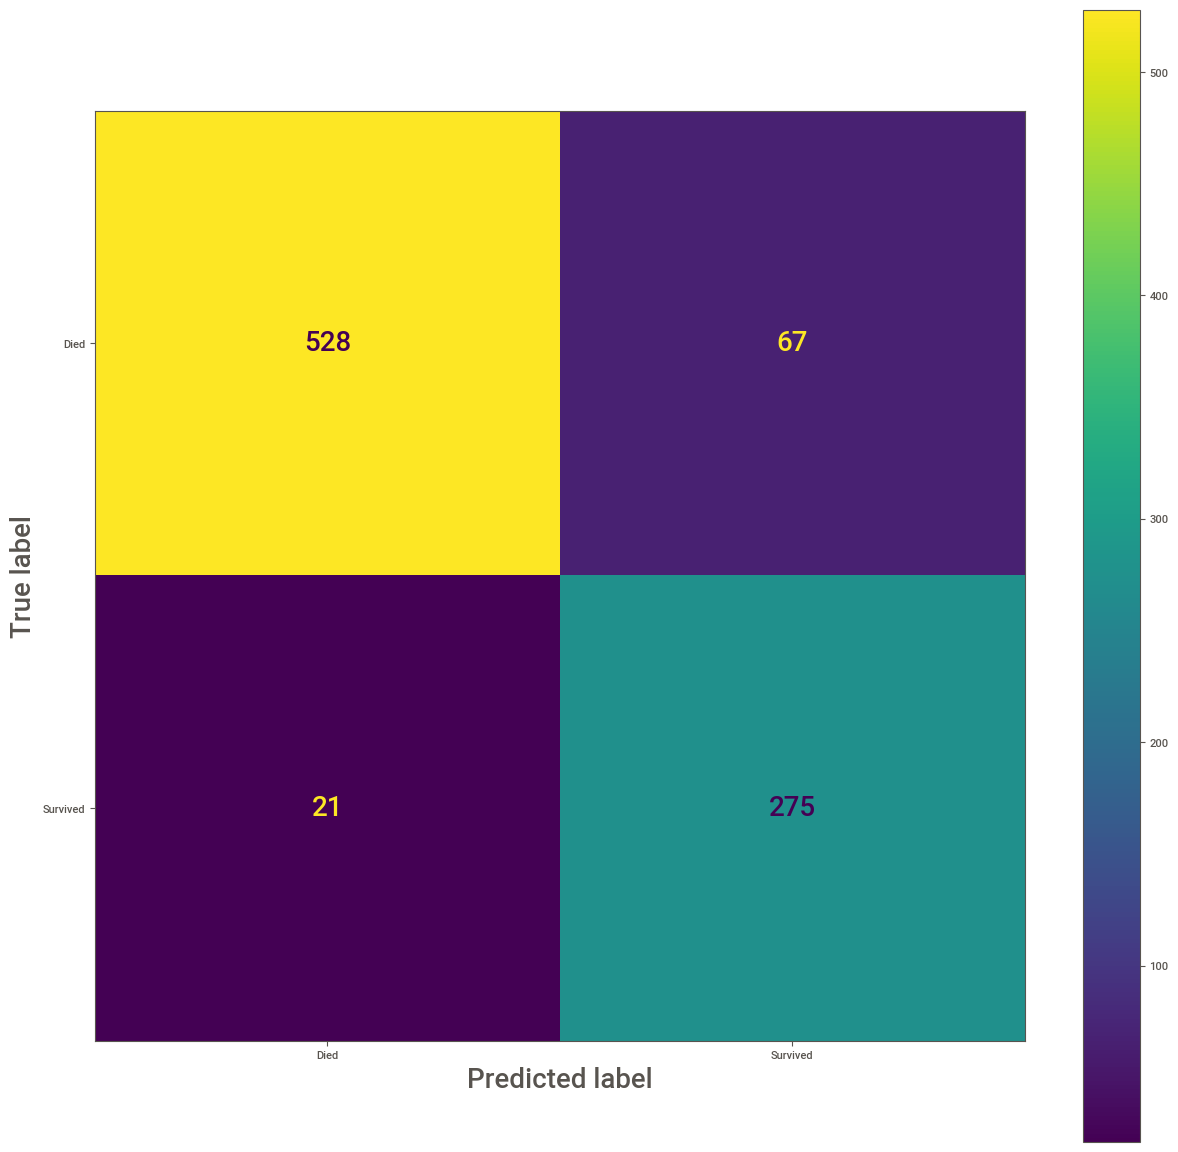

In [ ]:
from sklearn.metrics._plot.confusion_matrix import ConfusionMatrixDisplay
from sklearn import metrics

def conf_mat(pred, targets):
    ConfusionMatrixDisplay.from_predictions(pred, targets, display_labels=['Died', 'Survived'])
    print(f'\tRecall: {metrics.recall_score(targets, pred, average="weighted")}\n',
          f'\tPrecision: {metrics.precision_score(targets, pred, average="weighted")}\n',
          f'\tF-Score: {metrics.f1_score(targets, pred, average="weighted")}\n',
          f'\tAccuracy: {metrics.accuracy_score(targets, pred)}')
    
conf_mat(model2.predict(pol_df), t)

Now lets plot the ROC curve and calculate the AUC score for the model in it's classification solution.

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(labels, preds):
    auc_score = roc_auc_score(labels, preds)
    fpr, tpr, thresholds = roc_curve(labels, preds)
    roc_df = pd.DataFrame({ 'fpr' : fpr, 'tpr' : tpr, 'thresholds' : thresholds })
    fig = px.line(roc_df, x='fpr', y='tpr', title=f'AUC: {auc_score:.2f}')
    fig.show()

plot_roc_curve(t, model2.predict(pol_df))

## Creating the final test file 'submission.csv'

In this section I'm going to repeat all the process above but this time on the test group.

Let's create a function that prepares the data the same way we prepared the test set.

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

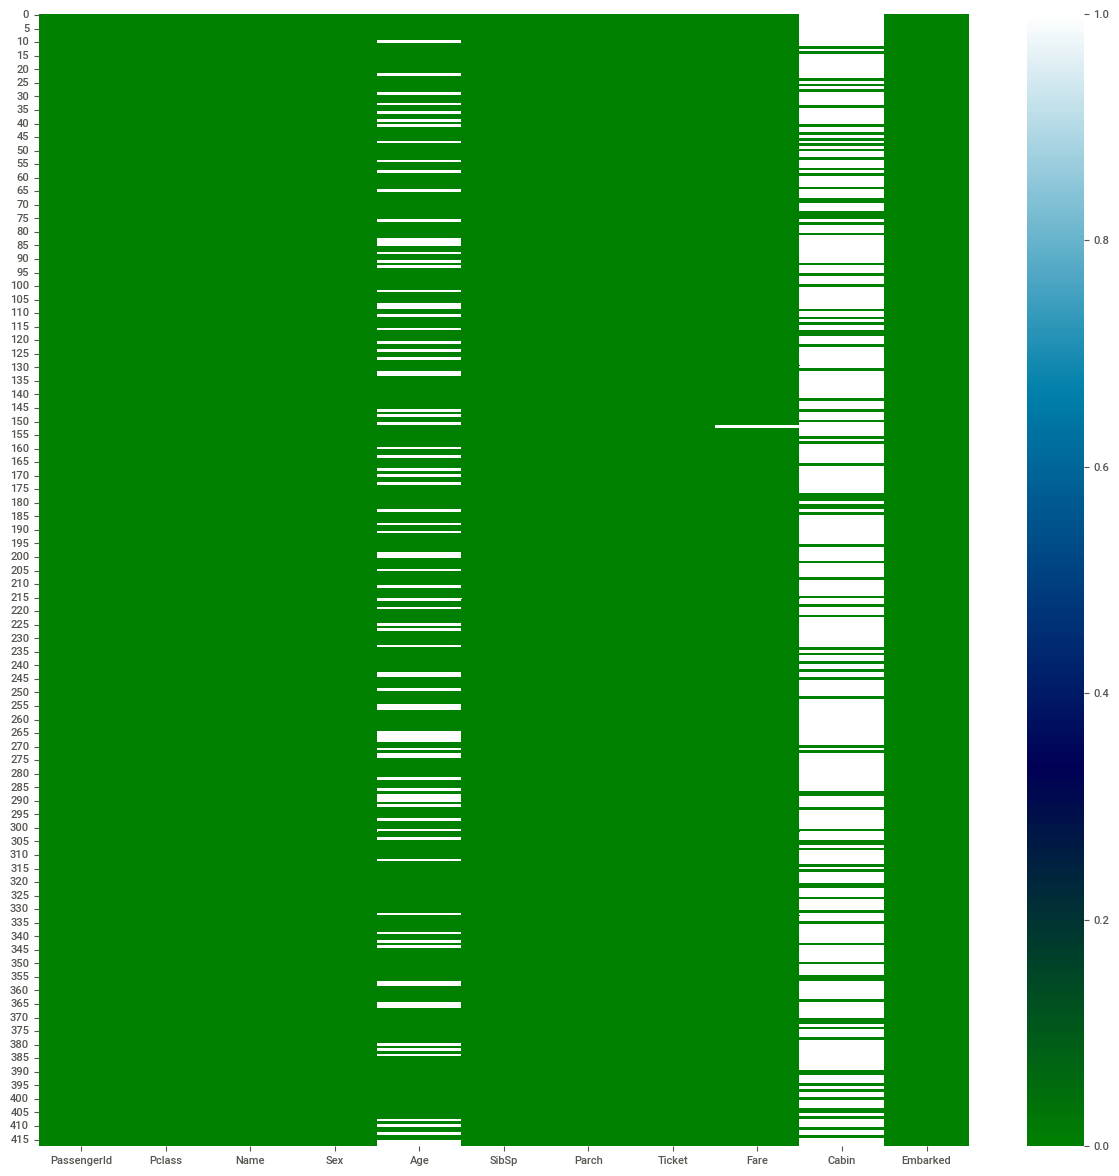

In [ ]:
test_data = pd.read_csv(r'./test.csv')
display(test_data.isna().any())
sns.heatmap(data=test_data.isnull(), cmap='ocean')

Analyze the test data we have further using SweetViz.

                                             |          | [  0%]   00:00 -> (? left)


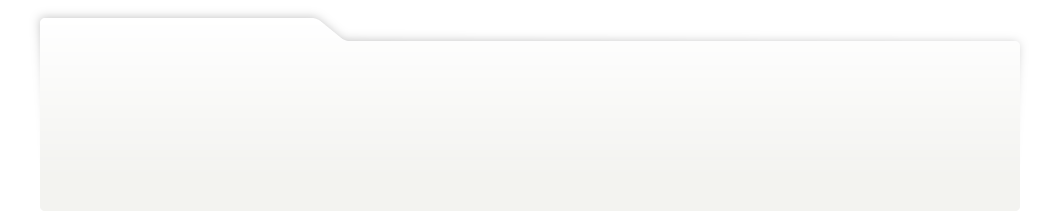
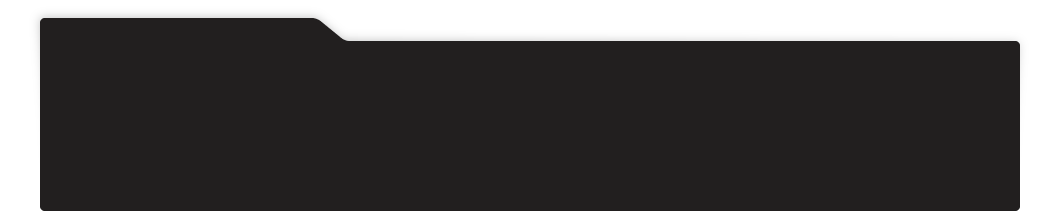
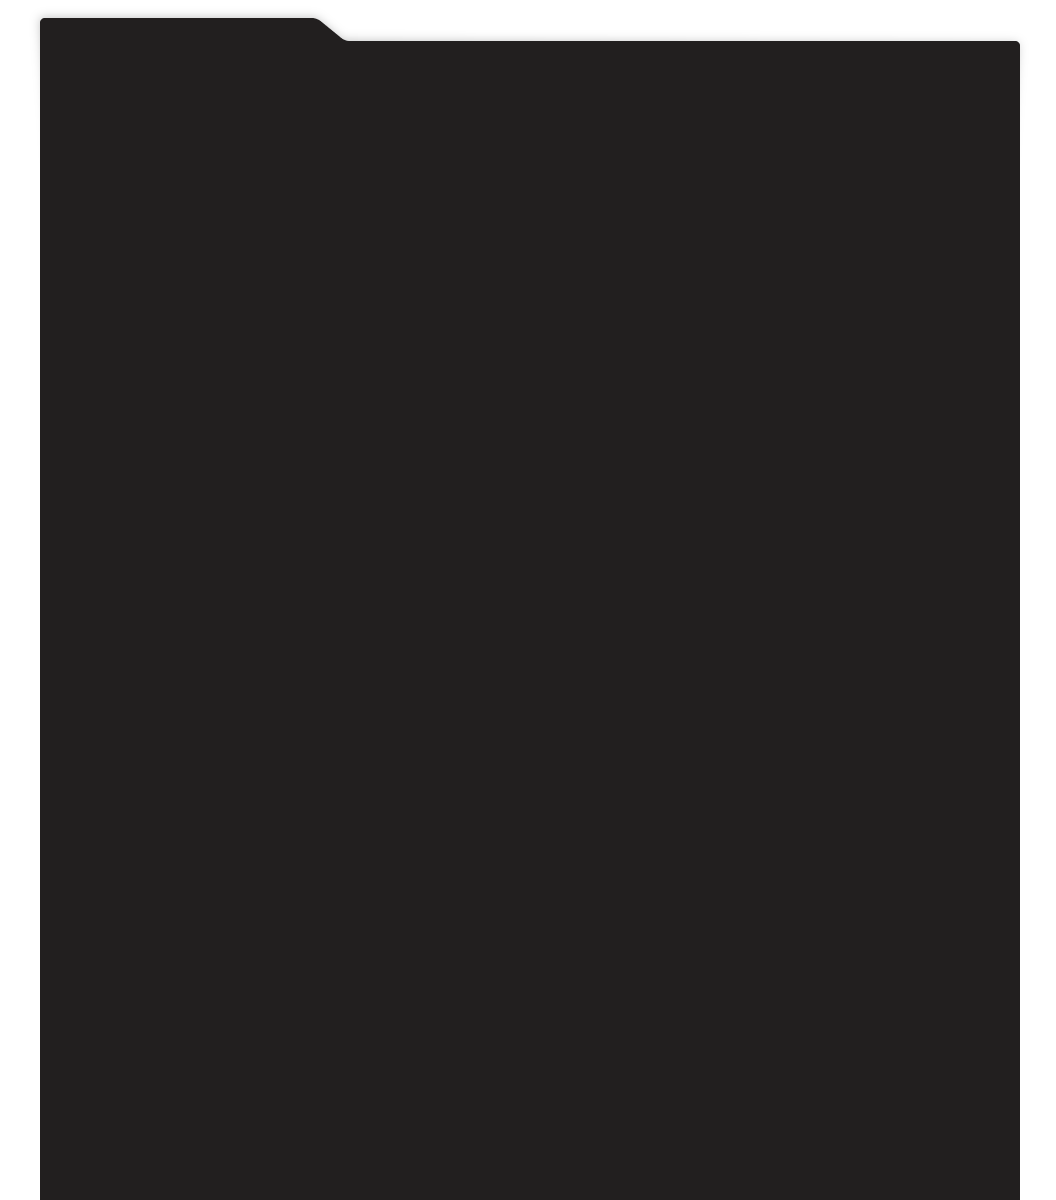
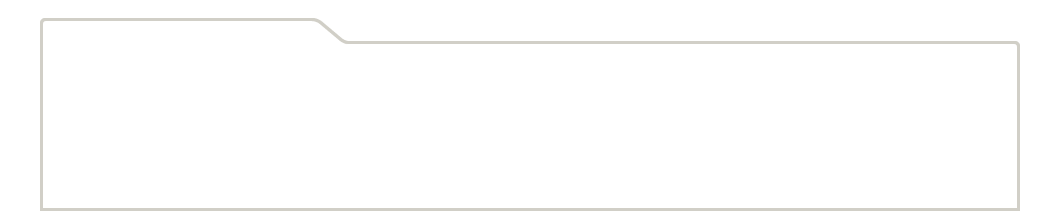
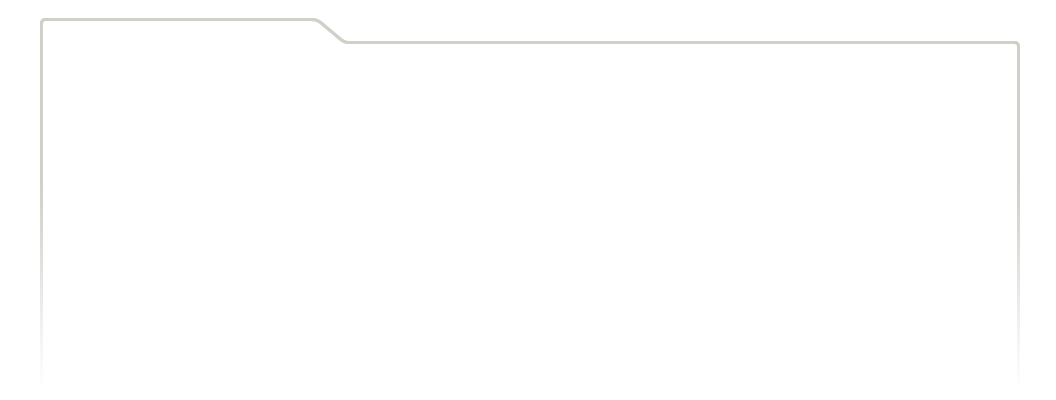
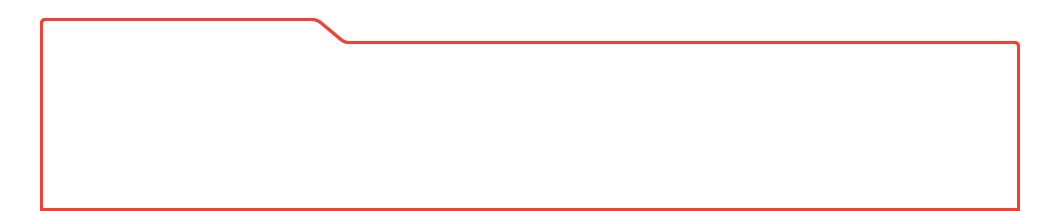
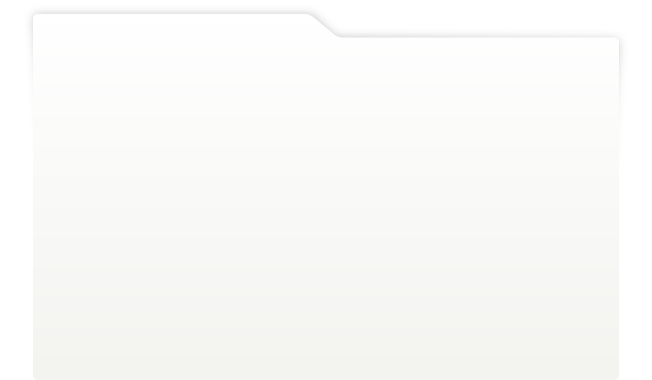
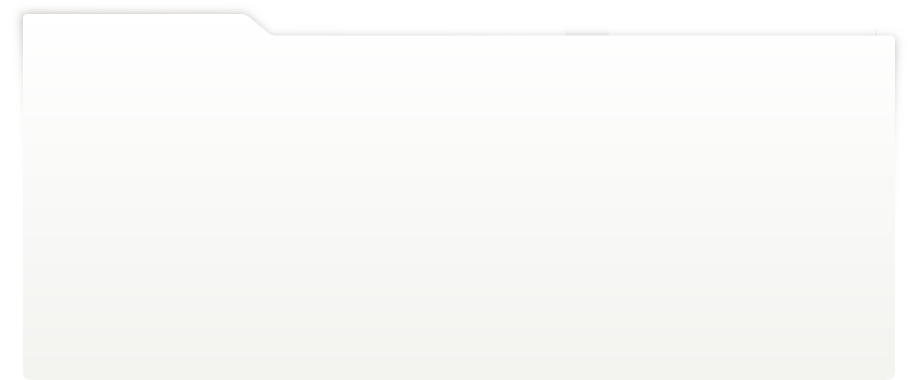
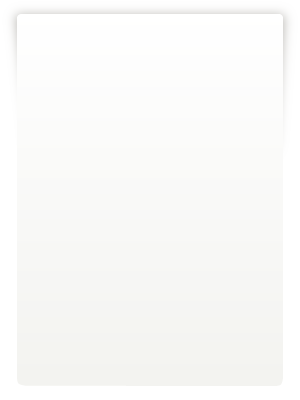
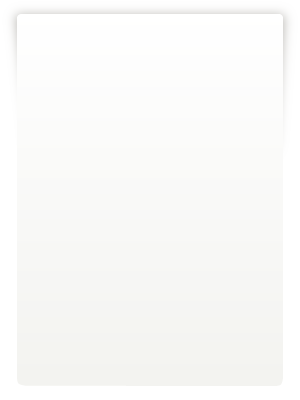
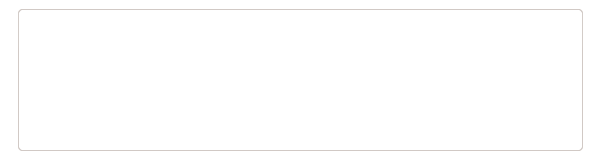
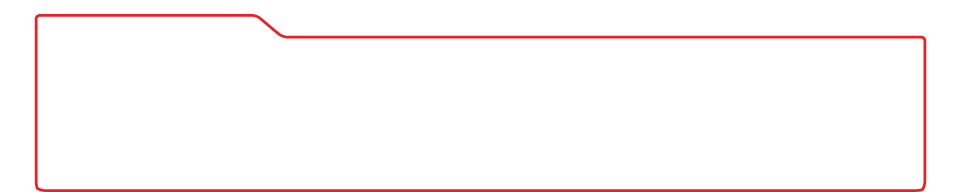
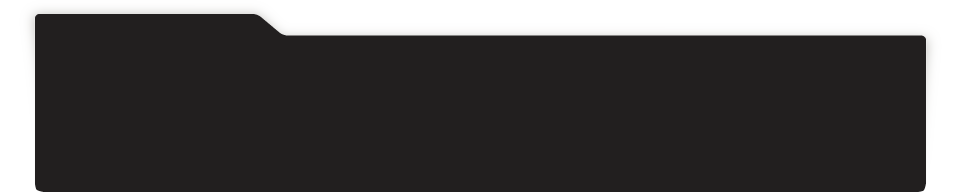
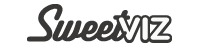
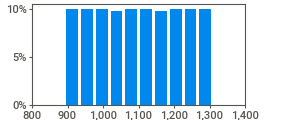
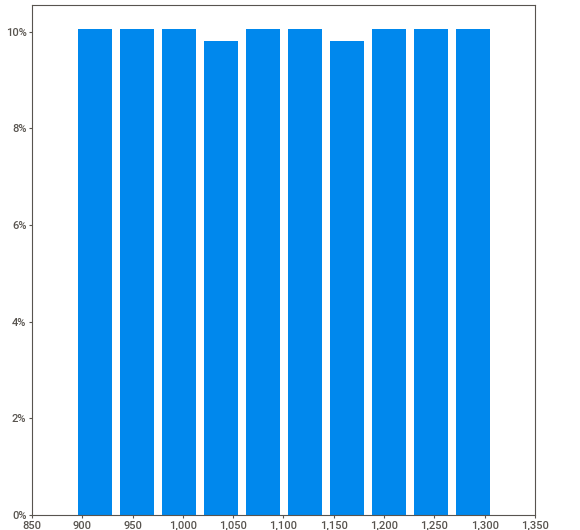
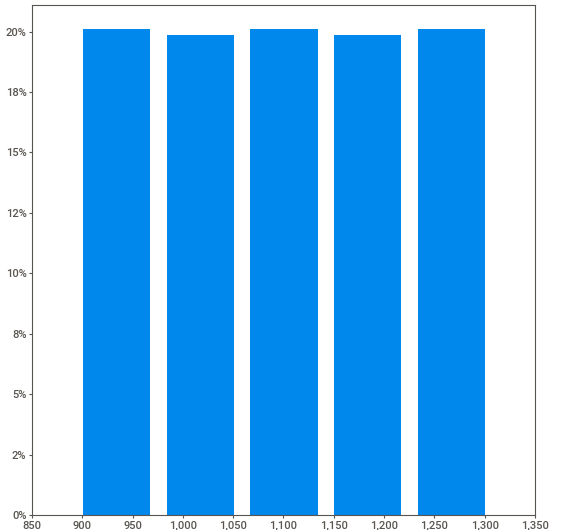
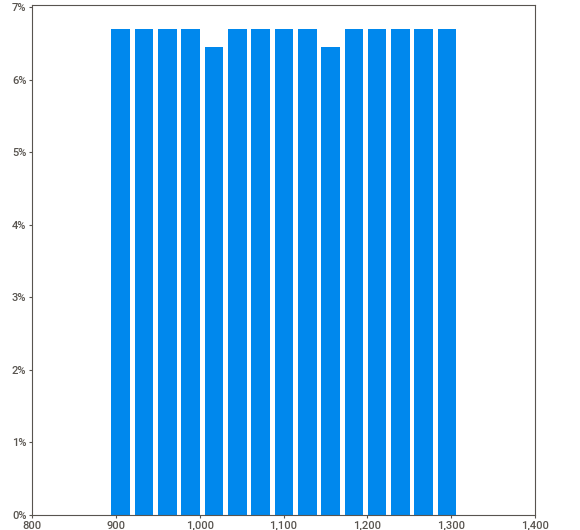
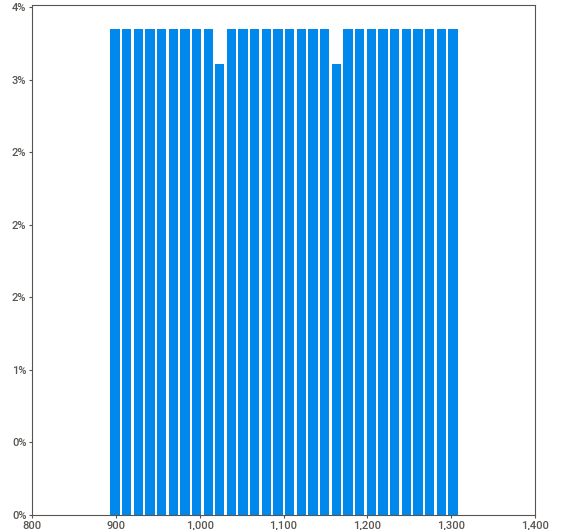
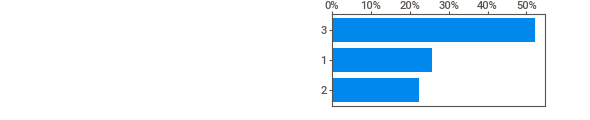
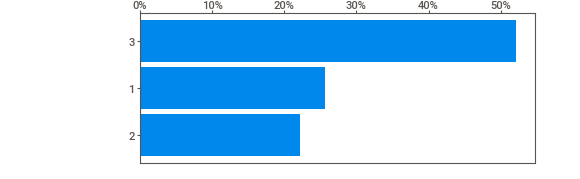
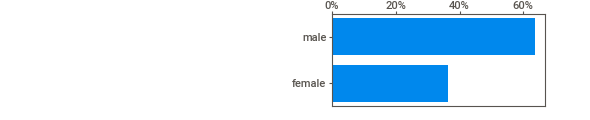
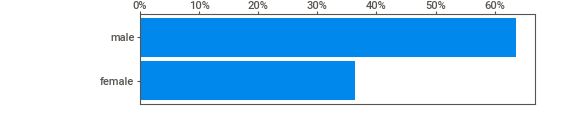
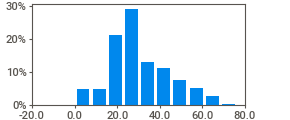
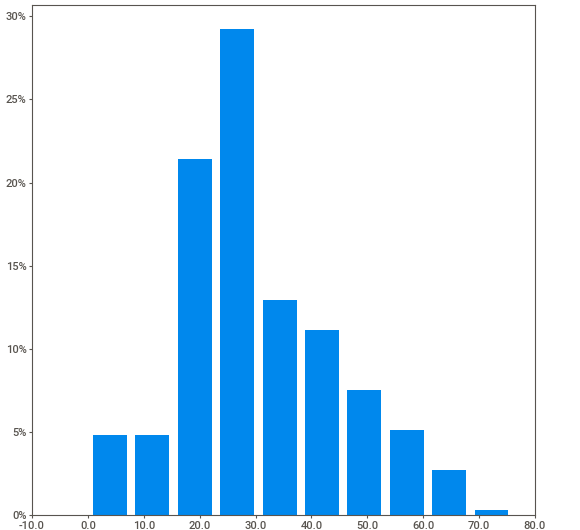
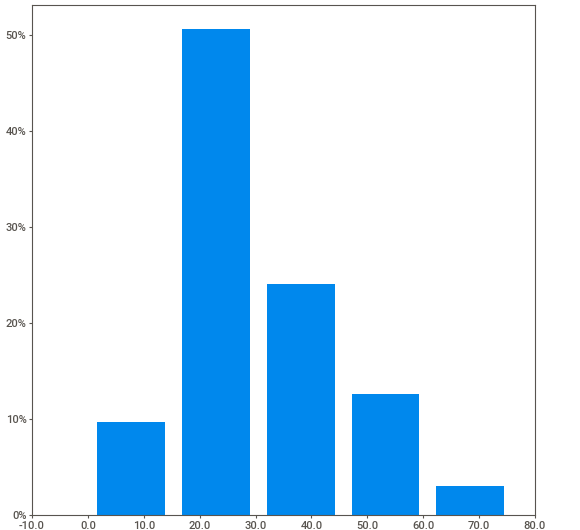
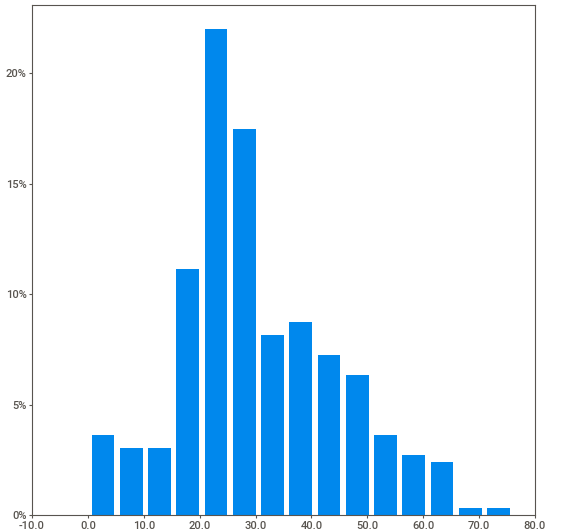
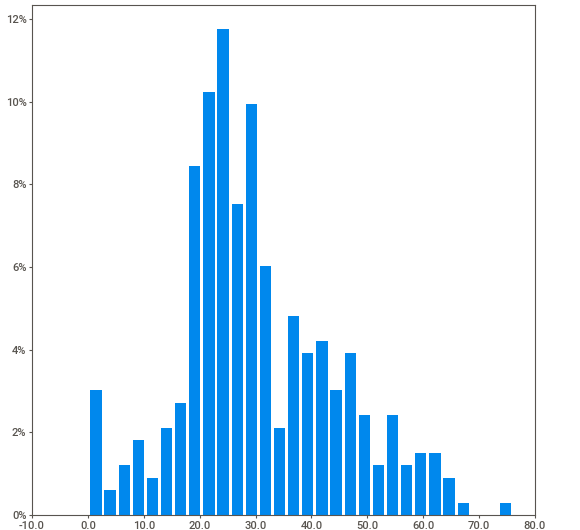
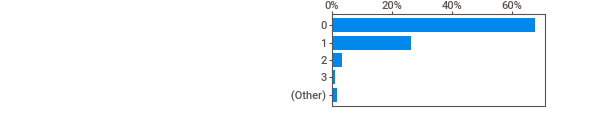
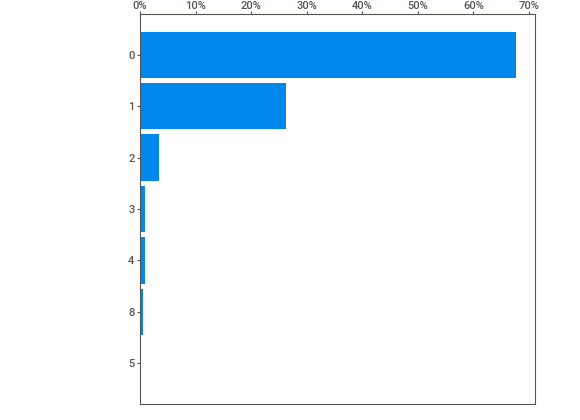
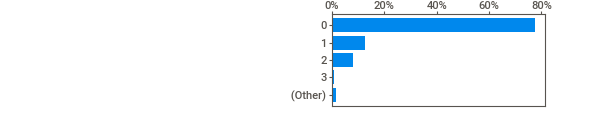
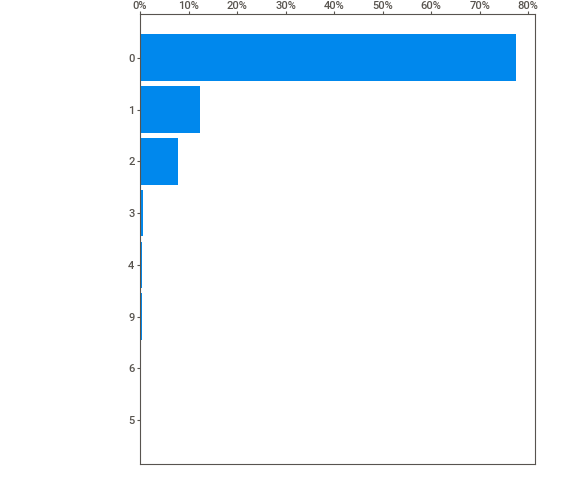
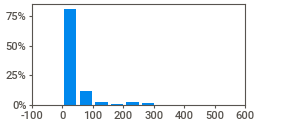
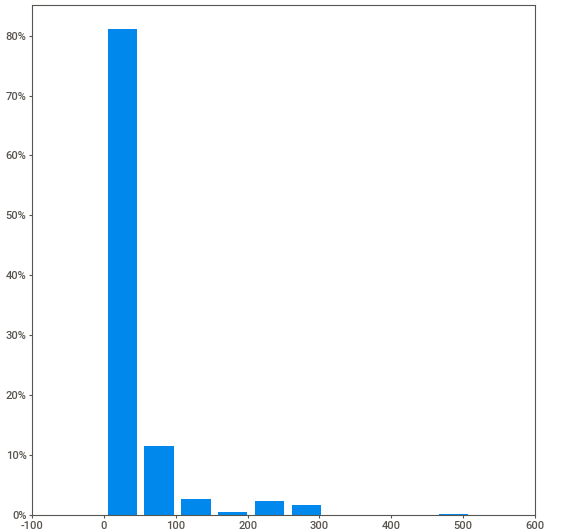
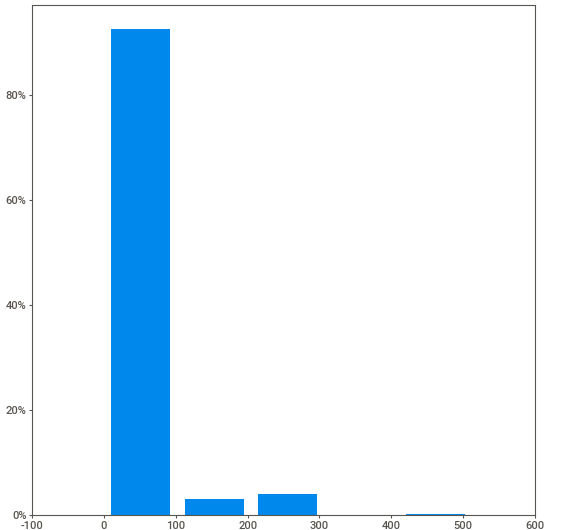
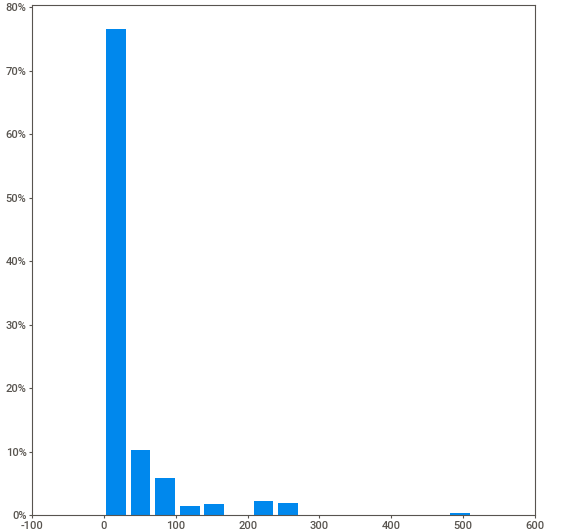
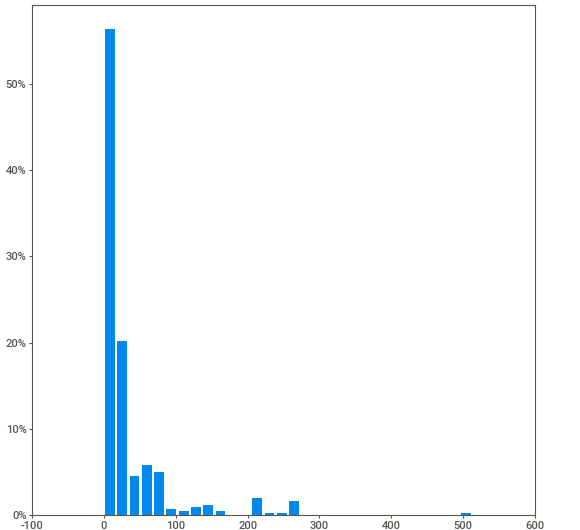
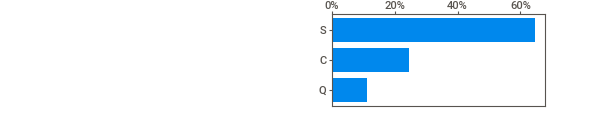
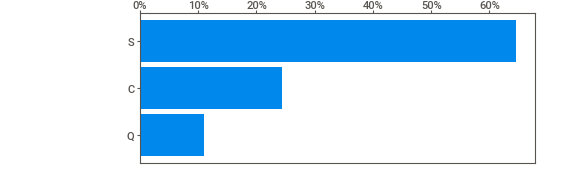
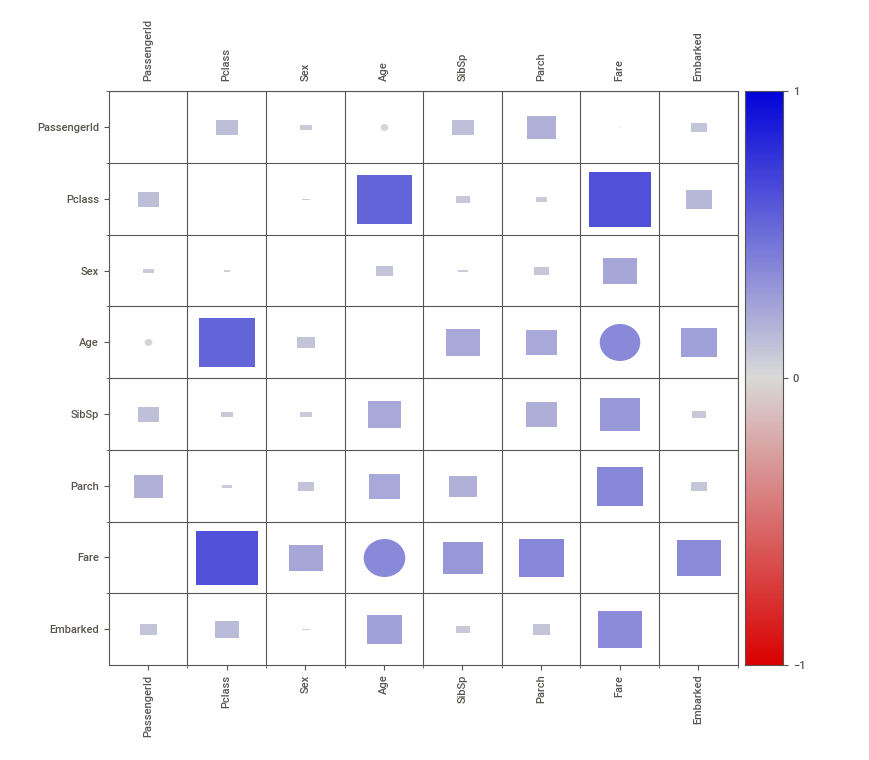
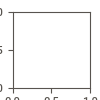

In [ ]:
test_report = sw.analyze(test_data)
test_report.show_notebook(layout='vertical')

In [ ]:
def prepare_data(df: pd.DataFrame):
    df.replace('', np.NaN, inplace=True)
    df.fillna(np.NaN, inplace=True)
    binary_cabin = [1 if str(x) != 'nan' else 0 for x in df['Cabin'].tolist()]
    df.replace(df['Cabin'].tolist(), binary_cabin, inplace=True)
    relatives = [x+y for x,y in zip(df['SibSp'], df['Parch'])]
    df['Relatives'] = relatives
    titles = df['Name'].str.extract(' ([a-zA-Z]+)\.')
    df['Title'] = titles
    df['Title'] = df['Title'].replace(['Capt', 'Col', 'Dr', 'Lady', 'Rev', 'Dona', \
    'Mme', 'Countess', 'Don', 'Major', 'Sir', 'Jonkheer', 'Mlle'], 'Other')
    df['Title'] = df['Title'].replace('Ms', 'Miss')
    df.replace(dict([(x,y) for x,y in zip(rate['Title'], rate['Survived'])]), inplace=True)
    new_sex = [1 if x=='female' else 0 for x in df['Sex']]
    df.replace(df['Sex'].tolist(), new_sex, inplace=True)
    
    transformed = df['Embarked'].to_numpy().reshape(-1, 1)
    ohe = OneHotEncoder(sparse=False).fit(transformed)
    embarked_encoded = pd.DataFrame(ohe.transform(transformed), columns=ohe.get_feature_names_out())
    df = pd.concat([df, embarked_encoded], axis=1)
    df.drop('Embarked', axis=1, inplace=True)

    lonely = [1 if x==0 else 0 for x in df['Relatives']]
    df['Lonely'] = lonely
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

    pol_t = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), MinMaxScaler())
    data = pd.DataFrame(pol_t.fit_transform(df), columns=pol_t.get_feature_names_out())

    optim_test_df = data.loc[:, selector.support_]

    return optim_test_df

In [ ]:
#Fare is missing so I just add a mean, everything else as I did before for age and cabin
mean_age = round(test_data['Age'].dropna().mean())
test_data['Age'].fillna(mean_age, inplace=True)
fare_mean = round(test_data['Fare'].dropna().mean())
test_data['Fare'].fillna(fare_mean, inplace=True)

# now I can pass it safely to the function we created and it will handle it propertly.
optim_test_df = prepare_data(test_data)
display(optim_test_df.isna().any(), optim_test_df)

Pclass              False
Sex                 False
SibSp               False
Parch               False
Fare                False
Relatives           False
Title               False
Pclass^2            False
Pclass Sex          False
Pclass SibSp        False
Pclass Parch        False
Pclass Fare         False
Pclass Relatives    False
Pclass Title        False
Sex^2               False
Sex SibSp           False
Sex Fare            False
Sex Title           False
Sex x0_C            False
Sex x0_Q            False
Sex x0_S            False
Age Parch           False
Age Fare            False
SibSp Title         False
SibSp x0_Q          False
Parch Fare          False
Parch x0_Q          False
Fare^2              False
Fare Cabin          False
Fare Title          False
Fare x0_C           False
Fare x0_Q           False
Fare x0_S           False
Title^2             False
dtype: bool

Pclass  Sex  SibSp     Parch      Fare  Relatives     Title  Pclass^2  \
0       1.0  0.0  0.000  0.000000  0.015282        0.0  0.000000     1.000   
1       1.0  1.0  0.125  0.000000  0.013663        0.1  1.000000     1.000   
2       0.5  0.0  0.000  0.000000  0.018909        0.0  0.000000     0.375   
3       1.0  0.0  0.000  0.000000  0.016908        0.0  0.000000     1.000   
4       1.0  1.0  0.125  0.111111  0.023984        0.2  1.000000     1.000   
..      ...  ...    ...       ...       ...        ...       ...       ...   
413     1.0  0.0  0.000  0.000000  0.015713        0.0  0.000000     1.000   
414     0.0  1.0  0.000  0.000000  0.212559        0.0  0.419318     0.000   
415     1.0  0.0  0.000  0.000000  0.014151        0.0  0.000000     1.000   
416     1.0  0.0  0.000  0.000000  0.015713        0.0  0.000000     1.000   
417     1.0  0.0  0.125  0.111111  0.043640        0.2  0.658444     1.000   

     Pclass Sex  Pclass SibSp  ...  SibSp x0_Q  Parch Fare  Parch x0_Q  \
0      0.000000         0.000  ...         0.0    0.000000         0.0   
1      1.000000         0.125  ...         0.0    0.000000         0.0   
2      0.000000         0.000  ...         0.0    0.000000         0.0   
3      0.000000         0.000  ...         0.0    0.000000         0.0   
4      1.000000         0.125  ...         0.0    0.011680         0.0   
..          ...           ...  ...         ...         ...         ...   
413    0.000000         0.000  ...         0.0    0.000000         0.0   
414    0.333333         0.000  ...         0.0    0.000000         0.0   
415    0.000000         0.000  ...         0.0    0.000000         0.0   
416    0.000000         0.000  ...         0.0    0.000000         0.0   
417    0.000000         0.125  ...         0.0    0.021253         0.0   

       Fare^2  Fare Cabin  Fare Title  Fare x0_C  Fare x0_Q  Fare x0_S  \
0    0.000234    0.000000    0.003023   0.000000   0.086991   0.000000   
1    0.000187    0.000000    0.013663   0.000000   0.000000   0.026616   
2    0.000358    0.000000    0.003741   0.000000   0.107639   0.000000   
3    0.000286    0.000000    0.003345   0.000000   0.000000   0.032937   
4    0.000575    0.000000    0.023984   0.000000   0.000000   0.046721   
..        ...         ...         ...        ...        ...        ...   
413  0.000247    0.000000    0.003108   0.000000   0.000000   0.030608   
414  0.045181    0.212559    0.113546   0.212559   0.000000   0.000000   
415  0.000200    0.000000    0.002799   0.000000   0.000000   0.027567   
416  0.000247    0.000000    0.003108   0.000000   0.000000   0.030608   
417  0.001904    0.000000    0.031683   0.043640   0.000000   0.000000   

      Title^2  
0    0.000000  
1    1.000000  
2    0.000000  
3    0.000000  
4    1.000000  
..        ...  
413  0.000000  
414  0.256252  
415  0.000000  
416  0.000000  
417  0.507831  

[418 rows x 34 columns]

Let's validate that the outputed features and normalization is the same as the optimal train dataframe.

In [ ]:
optim_df

Pclass  Sex  SibSp     Parch      Fare  Relatives     Title  Pclass^2  \
0       1.0  0.0  0.125  0.000000  0.014151        0.1  0.000000     1.000   
1       0.0  1.0  0.125  0.000000  0.139136        0.1  1.000000     0.000   
2       1.0  1.0  0.000  0.000000  0.015469        0.0  0.854333     1.000   
3       0.0  1.0  0.125  0.000000  0.103644        0.1  1.000000     0.000   
4       1.0  0.0  0.000  0.000000  0.015713        0.0  0.000000     1.000   
..      ...  ...    ...       ...       ...        ...       ...       ...   
886     0.5  0.0  0.000  0.000000  0.025374        0.0  0.419318     0.375   
887     0.0  1.0  0.000  0.000000  0.058556        0.0  0.854333     0.000   
888     1.0  1.0  0.125  0.333333  0.045771        0.3  0.854333     1.000   
889     0.0  0.0  0.000  0.000000  0.058556        0.0  0.000000     0.000   
890     1.0  0.0  0.000  0.000000  0.015127        0.0  0.000000     1.000   

     Pclass Sex  Pclass SibSp  ...  SibSp x0_Q  Parch Fare  Parch x0_Q  \
0      0.000000      0.125000  ...         0.0    0.000000         0.0   
1      0.333333      0.041667  ...         0.0    0.000000         0.0   
2      1.000000      0.000000  ...         0.0    0.000000         0.0   
3      0.333333      0.041667  ...         0.0    0.000000         0.0   
4      0.000000      0.000000  ...         0.0    0.000000         0.0   
..          ...           ...  ...         ...         ...         ...   
886    0.000000      0.000000  ...         0.0    0.000000         0.0   
887    0.333333      0.000000  ...         0.0    0.000000         0.0   
888    1.000000      0.125000  ...         0.0    0.044582         0.0   
889    0.000000      0.000000  ...         0.0    0.000000         0.0   
890    0.000000      0.000000  ...         0.0    0.000000         0.0   

       Fare^2  Fare Cabin  Fare Title  Fare x0_C  Fare x0_Q  Fare x0_S  \
0    0.000200    0.000000    0.003170   0.000000   0.000000   0.027567   
1    0.019359    0.139136    0.157545   0.139136   0.000000   0.000000   
2    0.000239    0.000000    0.015469   0.000000   0.000000   0.030133   
3    0.010742    0.103644    0.117358   0.000000   0.000000   0.201901   
4    0.000247    0.000000    0.003520   0.000000   0.000000   0.030608   
..        ...         ...         ...        ...        ...        ...   
886  0.000644    0.000000    0.015348   0.000000   0.000000   0.049430   
887  0.003429    0.058556    0.058556   0.000000   0.000000   0.114068   
888  0.002095    0.000000    0.045771   0.000000   0.000000   0.089163   
889  0.003429    0.058556    0.013116   0.058556   0.000000   0.000000   
890  0.000229    0.000000    0.003388   0.000000   0.086111   0.000000   

      Title^2  
0    0.000000  
1    1.000000  
2    0.770989  
3    1.000000  
4    0.000000  
..        ...  
886  0.256252  
887  0.770989  
888  0.770989  
889  0.000000  
890  0.000000  

[891 rows x 34 columns]

**The final result** 😯

Let's pass the optimal test data to the optimal model and recieve our predictions!

In [ ]:
results = pd.read_csv(r'./test.csv') # read the test data again for the passengerId's
results['Survived'] = model2.predict(optim_test_df) # predict using our optim model - 
# Bootstrap + optimal features -> note that I also did that with the others.
results = results[['PassengerId', 'Survived']] # save only the needed features for the submission file
results.to_csv(r'./submission.csv', index=False) # generate file
display(results)

PassengerId  Survived
0            892         0
1            893         0
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         1

[418 rows x 2 columns]

## Kaggle Submissions & Place on the leaderboard

Here is the highest score I got using the three models we were assigned:

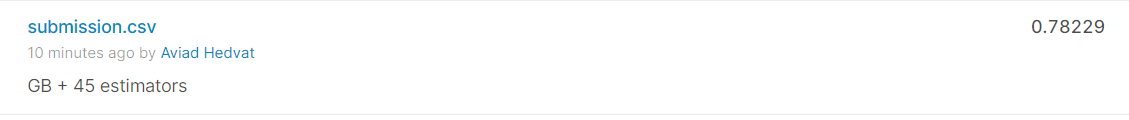

Altough this is actually my highest score overall (from the first assignment using Logistic Regression, the image took from the first assignment)

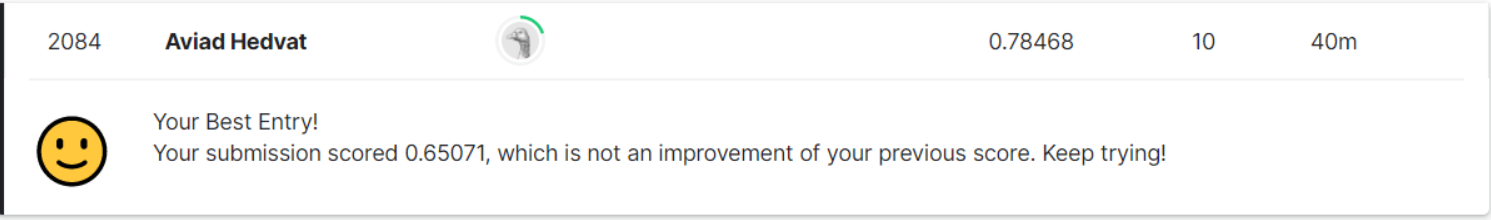

Finally, these are my last 10 submissions:

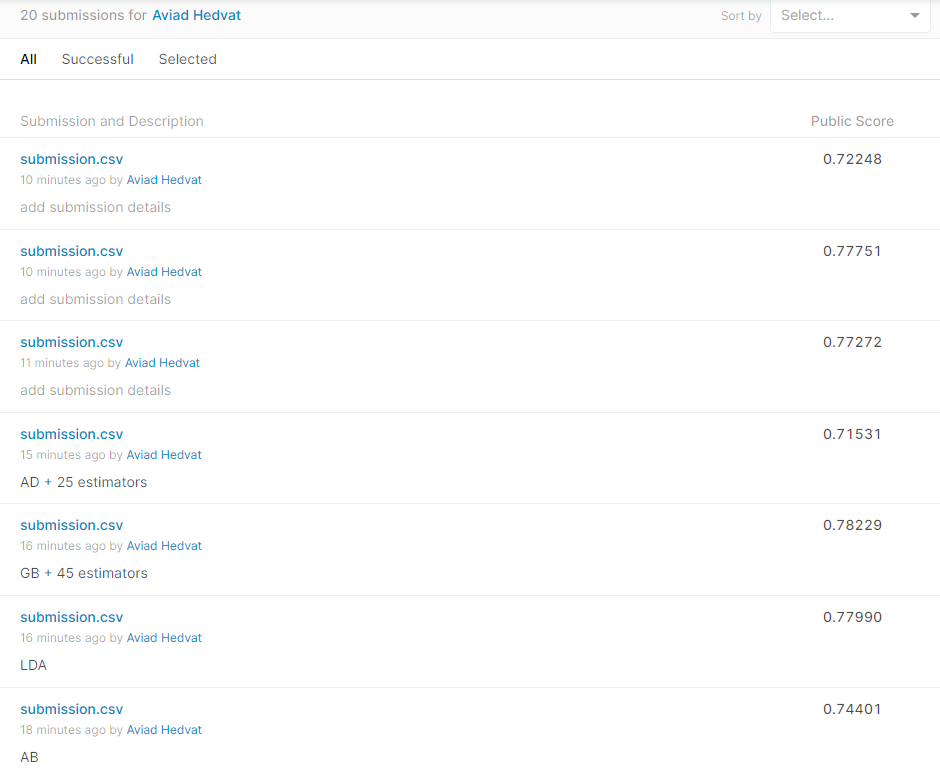

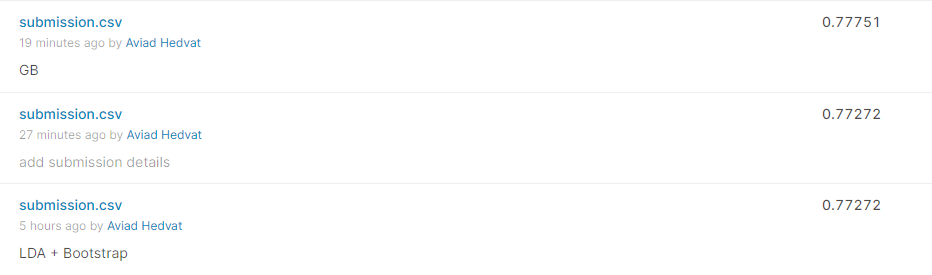

# Summary
So first I am going to address the test I mentioned about the GradientBoosting - After submitting a couple of times with different parameters like random_state, the scores are almost identical, but in most cases, generally GradientBoosting does better. So even though the score using GridSearch and train-valid sets that are supposed to predict the best fit for the test group were highest on Bootstrap, after training on the whole training set, the model that score the highest preformed worse on the test.

My Bagging Bootstrap Ensemble method ended up scoring 78.229% on the test but it is still worse than the best score of 78.468% I've had in the first assignment with a LogisticRegression and custom feature selection instead of polynomial increase.

**Bugs** - I've had some crucial bugs when testing the models, a few of them were:

  * Mistaking the GradientBoosting for the Gradient Boosing because of COPY-PASTE typo when reusing my own code.
  * Not using Bootstrap when creating the final model (forgetting)
  * Training the final model on the wrong pol_df because I were using the same variable name for poth the polynomial features of the test and the train.
  * I've passed the final model a dataframe with different features than the ones he expected to recieve because of the way PolynomialFeatures work.

Conclusions from the bugs:

  1. These bugs made me realize that I need to slow down, I was rushing to submitting my model and seeing the score so much that it made me do some silly mistakes that ended up screwing up my score.
  1. It is more preferable to seperate the variables as much as possible, especially when working in Colab because sometimes the runtime will bug out when overwriting variables, remembering the old ones. More importantly, it makes the code more accessible for debugging (you don't need to restart the section of code or even worse - the runtime, everytime you realize you want to go back to the variable's last state.
  1. The Data Processing of the test has to be the **EXACT** same on the test set as we've done on the train set, I cannot stress this conclusion enough as it caused much frustration and debugging for me because I didn't notice the column names of the optimal test set that I pass to the final model was slightly different in column positions and names from the original one and it caused bad scoring on the test data.

Didn't work:

  * Using LDA, BaggingNFold and BaggingBootstrap all yielded the exast same score on the training set meaining the the models did not differ enough to differ in their predictions aswell and so I were forced to look for other methods of imporving the overall score.
  * Using the same pipeline on the test as the train (normalization on test according to the train scales).

Did work:

  * It did seem crucial and indeed imporved the score to normalize the data only after using Polynomial Increase, that is probably because when multiplying features after normalization we lose crucial correlation and scale between different features.

## Sources

* Inspiration to the data analysis and feature engineering: \ https://www.kaggle.com/startupsci/titanic-data-science-solutions \ https://towardsdatascience.com/comprehensive-beginners-guide-to-kaggle-titanic-survival-prediction-competition-solution-21c5be2cec2c
* Bugfixing the differnt feature names and outputs for test and train optimal models: \ https://github.com/scikit-learn/scikit-learn/issues/21485